In [1]:
import requests
import pandas as pd
import json
#from collections import OrderedDict
#from pyjstat import pyjstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#r = requests.get('https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22JSON-stat%22,%22version%22:%222.0%22%7D,%22matrix%22:%22TAM07%22%7D,%22version%22:%222.0%22%7D%7D')
#x = r.json()
#df = pd.DataFrame(x['result'])
#r = requests.get('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TAM07/JSON-stat/2.0/en')
#df = pd.read_json(r.text)

#print(r.text)

In [2]:
pd.set_option('display.max_columns',None)

## Loading dataframe for the Netherlands

In [3]:
dfNd = pd.read_csv('Monthly_figures_on_aviation.csv', sep=';') #Information for Dutch airports
dfNd.tail(10)

,Airports,Periods,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air traf

## Understanding and cleaning the database for use in the analysis

In [4]:
dfNd['Airports'].unique()

array(['Total Dutch airports', 'Amsterdam Airport Schiphol',
       'Rotterdam The Hague Airport', 'Eindhoven Airport',
       'Maastricht Aachen Airport', 'Groningen Airport Eelde'],
      dtype=object)

In [5]:
dfNd['Periods'].unique()

array(['1997', '1998', '1999 January', '1999 February', '1999 March',
       '1999 April', '1999 May', '1999 June', '1999 July', '1999 August',
       '1999 September', '1999 October', '1999 November', '1999 December',
       '1999', '2000 January', '2000 February', '2000 March',
       '2000 April', '2000 May', '2000 June', '2000 July', '2000 August',
       '2000 September', '2000 October', '2000 November', '2000 December',
       '2000', '2001 January', '2001 February', '2001 March',
       '2001 April', '2001 May', '2001 June', '2001 July', '2001 August',
       '2001 September', '2001 October', '2001 November', '2001 December',
       '2001', '2002 January', '2002 February', '2002 March',
       '2002 April', '2002 May', '2002 June', '2002 July', '2002 August',
       '2002 September', '2002 October', '2002 November', '2002 December',
       '2002', '2003 January', '2003 February', '2003 March',
       '2003 April', '2003 May', '2003 June', '2003 July', '2003 August',
       '2003

In [6]:
dfNd[['Year','Month','Quarter']] = dfNd['Periods'].str.split(' ', expand=True) #Dividing the column Periods into year and month, with an extra column to identify information in Quarters to dropp it later

In [7]:
dfNd.tail()

,Airports,Periods,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air traf

In [8]:
dfNd.Year.unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2022*', '2023'], dtype=object)

In [9]:
dfNd.Month.unique()

array([None, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       '1st', '2nd', '3rd', '4th', 'January*', 'February*', 'March*',
       'April*', 'May*', 'June*', 'July*', 'August*', 'September*',
       'October*', 'November*', 'December*'], dtype=object)

In [10]:
dfNd.Quarter.unique()

array([None, 'quarter', 'quarter*'], dtype=object)

In [11]:
dfNd.loc[dfNd["Month"] == "January*", "Month"] = "January" #Values with * are not confirmed yet, but they will be used as final for the study
dfNd.loc[dfNd["Month"] == "February*", "Month"] = "February"
dfNd.loc[dfNd["Month"] == "March*", "Month"] = "March"
dfNd.loc[dfNd["Month"] == "April*", "Month"] = "April"
dfNd.loc[dfNd["Month"] == "May*", "Month"] = "May"
dfNd.loc[dfNd["Month"] == "June*", "Month"] = "June"
dfNd.loc[dfNd["Month"] == "July*", "Month"] = "July"
dfNd.loc[dfNd["Month"] == "August*", "Month"] = "August"
dfNd.loc[dfNd["Month"] == "September*", "Month"] = "September"
dfNd.loc[dfNd["Month"] == "October*", "Month"] = "October"
dfNd.loc[dfNd["Month"] == "November*", "Month"] = "November"
dfNd.loc[dfNd["Month"] == "December*", "Month"] = "December"

In [12]:
dfNd.Month.unique()

array([None, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       '1st', '2nd', '3rd', '4th'], dtype=object)

In [13]:
dfNd = dfNd.loc[(dfNd['Month']!='1st') & (dfNd['Month']!='2nd') & (dfNd['Month']!='3rd') & (dfNd['Month']!='4th')] #Filtering the database so it is per month

In [14]:
dfNd.shape

(1944, 107)

In [15]:
dfNd.Month.unique()

array([None, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [16]:
dfNd.tail()

,Airports,Periods,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air traf

In [17]:
dfNd.Quarter.unique()

array([None], dtype=object)

In [18]:
dfNd = dfNd.drop('Quarter', axis='columns')

In [19]:
dfNd = dfNd.fillna(value=np.nan)

In [20]:
dfNd.head()

,Airports,Periods,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air traf

In [21]:
dfNd = dfNd[dfNd['Month'].notna()]

In [22]:
dfNd.head()

,Airports,Periods,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air traf

In [23]:
dfNd = dfNd.drop('Periods', axis='columns')

In [24]:
dfNd.head()

,Airports,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air traffic/Carg

In [25]:
dfNd = dfNd[ ['Month'] + [ col for col in dfNd.columns if col != 'Month' ] ]
dfNd = dfNd[ ['Year'] + [ col for col in dfNd.columns if col != 'Year' ] ]

In [26]:
dfNd.head()

,Year,Month,Airports,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Flights/All flights/Non-scheduled (number),Commercial air traffic/Flights/Arrivals/Total arrivals flights (number),Commercial air traffic/Flights/Arrivals/Scheduled (number),Commercial air traffic/Flights/Arrivals/Non-scheduled (number),Commercial air traffic/Flights/Departures/Total departures flights (number),Commercial air traffic/Flights/Departures/Scheduled (number),Commercial air traffic/Flights/Departures/Non-scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number),Commercial air traffic/Passengers/Total passengers/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Non-scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Total arrivals passengers (number),Commercial air traffic/Passengers/Passenger arrivals/Scheduled (number),Commercial air traffic/Passengers/Passenger arrivals/Non-scheduled (number),Commercial air traffic/Passengers/Passenger departures/Total departures passengers (number),Commercial air traffic/Passengers/Passenger departures/Scheduled (number),Commercial air traffic/Passengers/Passenger departures/Non-scheduled (number),Commercial air traffic/Passengers/Country of origin/destination/Total country of origin/destination (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Europe total (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/EU countries (number),Commercial air traffic/Passengers/Country of origin/destination/Europe/Other Europe (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/North America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/America/South America (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Oceania (number),Commercial air traffic/Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Commercial air traffic/Passengers/Country of origin/destination/Unknown (number),Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Cargo/Total cargo/Scheduled cargo (ton),Commercial air traffic/Cargo/Total cargo/Non-scheduled cargo (ton),Commercial air traffic/Cargo/Unloaded cargo/Total unloaded cargo (ton),Commercial air t

In [27]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Commercial air traffic/Flights/All flights/Total flights (number)',
 'Commercial air traffic/Flights/All flights/Scheduled (number)',
 'Commercial air traffic/Flights/All flights/Non-scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)',
 'Commercial air traffic/Flights/Arrivals/Scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Non-scheduled (number)',
 'Commercial air traffic/Flights/Departures/Total departures flights (number)',
 'Commercial air traffic/Flights/Departures/Scheduled (number)',
 'Commercial air traffic/Flights/Departures/Non-scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
 'Commercial air traffic/Passengers/Total passengers/Scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Non-scheduled (number)',
 'Commerc

In [28]:
dfNd = dfNd.iloc[:, :-29] #To focus on passengers and cargo, getting rid of mail information

In [29]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Commercial air traffic/Flights/All flights/Total flights (number)',
 'Commercial air traffic/Flights/All flights/Scheduled (number)',
 'Commercial air traffic/Flights/All flights/Non-scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Total arrivals flights (number)',
 'Commercial air traffic/Flights/Arrivals/Scheduled (number)',
 'Commercial air traffic/Flights/Arrivals/Non-scheduled (number)',
 'Commercial air traffic/Flights/Departures/Total departures flights (number)',
 'Commercial air traffic/Flights/Departures/Scheduled (number)',
 'Commercial air traffic/Flights/Departures/Non-scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Total passengers (number)',
 'Commercial air traffic/Passengers/Total passengers/Scheduled (number)',
 'Commercial air traffic/Passengers/Total passengers/Non-scheduled (number)',
 'Commerc

In [30]:
dfNd.columns = dfNd.columns.str.lstrip("Commercial air traffic/")

In [31]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Flights/All flights/Total flights (number)',
 'Flights/All flights/Scheduled (number)',
 'Flights/All flights/Non-scheduled (number)',
 'Flights/Arrivals/Total arrivals flights (number)',
 'Flights/Arrivals/Scheduled (number)',
 'Flights/Arrivals/Non-scheduled (number)',
 'Flights/Departures/Total departures flights (number)',
 'Flights/Departures/Scheduled (number)',
 'Flights/Departures/Non-scheduled (number)',
 'Passengers/Total passengers/Total passengers (number)',
 'Passengers/Total passengers/Scheduled (number)',
 'Passengers/Total passengers/Non-scheduled (number)',
 'Passengers/Passenger arrivals/Total arrivals passengers (number)',
 'Passengers/Passenger arrivals/Scheduled (number)',
 'Passengers/Passenger arrivals/Non-scheduled (number)',
 'Passengers/Passenger departures/Total departures passengers (number)',
 'Passengers/Passenger departures

In [32]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Flights/All flights/Total flights (number)',
 'Flights/All flights/Scheduled (number)',
 'Flights/All flights/Non-scheduled (number)',
 'Flights/Arrivals/Total arrivals flights (number)',
 'Flights/Arrivals/Scheduled (number)',
 'Flights/Arrivals/Non-scheduled (number)',
 'Flights/Departures/Total departures flights (number)',
 'Flights/Departures/Scheduled (number)',
 'Flights/Departures/Non-scheduled (number)',
 'Passengers/Total passengers/Total passengers (number)',
 'Passengers/Total passengers/Scheduled (number)',
 'Passengers/Total passengers/Non-scheduled (number)',
 'Passengers/Passenger arrivals/Total arrivals passengers (number)',
 'Passengers/Passenger arrivals/Scheduled (number)',
 'Passengers/Passenger arrivals/Non-scheduled (number)',
 'Passengers/Passenger departures/Total departures passengers (number)',
 'Passengers/Passenger departures

In [33]:
dfNd.head()

,Year,Month,Airports,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Flights/All flights/Total flights (number),Flights/All flights/Scheduled (number),Flights/All flights/Non-scheduled (number),Flights/Arrivals/Total arrivals flights (number),Flights/Arrivals/Scheduled (number),Flights/Arrivals/Non-scheduled (number),Flights/Departures/Total departures flights (number),Flights/Departures/Scheduled (number),Flights/Departures/Non-scheduled (number),Passengers/Total passengers/Total passengers (number),Passengers/Total passengers/Scheduled (number),Passengers/Total passengers/Non-scheduled (number),Passengers/Passenger arrivals/Total arrivals passengers (number),Passengers/Passenger arrivals/Scheduled (number),Passengers/Passenger arrivals/Non-scheduled (number),Passengers/Passenger departures/Total departures passengers (number),Passengers/Passenger departures/Scheduled (number),Passengers/Passenger departures/Non-scheduled (number),Passengers/Country of origin/destination/Total country of origin/destination (number),Passengers/Country of origin/destination/Europe/Europe total (number),Passengers/Country of origin/destination/Europe/EU countries (number),Passengers/Country of origin/destination/Europe/Other Europe (number),Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number),Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number),Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number),Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number),Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number),Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number),Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number),Passengers/Country of origin/destination/Intercontinental/America/America (number),Passengers/Country of origin/destination/Intercontinental/America/North America (number),Passengers/Country of origin/destination/Intercontinental/America/Central America (number),Passengers/Country of origin/destination/Intercontinental/America/South America (number),Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number),Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number),Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number),Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number),Passengers/Country of origin/destination/Intercontinental/Oceania (number),Passengers/Country of origin/destination/Intercontinental/Other/unknown (number),Passengers/Country of origin/destination/Unknown (number),go/Total cargo/Total cargo (ton),go/Total cargo/Scheduled cargo (ton),go/Total cargo/Non-scheduled cargo (ton),go/Unloaded cargo/Total unloaded cargo (ton),go/Unloaded cargo/Scheduled cargo (ton),go/Unloaded cargo/Non-scheduled cargo (ton),go/Loaded cargo/Total loaded cargo (ton),go/Loaded cargo/Scheduled cargo (ton),go/Loaded cargo/Non-scheduled cargo (ton),go/Country of origin/destination/Total country of origin/destination (ton),go/Country of origin/destination/Europe cargo/Europe total cargo (ton),go/Country of origin/destination/Europe cargo/EU countries (ton),go/Country of origin/destination/Europe cargo/Other Europe (ton),go/Country of origin/destination/Intercontinental cargo/Total intercontinental cargo (ton),go/Country of origin/destination/Intercontinental cargo/Africa/Africa (ton),go/Country of origin/destination/Intercontinental cargo/Africa/North Africa (ton),go/Country of origin/destination/Intercontinental cargo/Africa/West Africa (ton),go/Country of origin/destination/Intercontinental cargo/Africa/Central Africa (ton),go/Country of origin/destination/Intercontinental cargo/Africa/East Africa (ton),go/Country of origin/destination/Intercontinental cargo/Africa/S

In [34]:
dfNd = dfNd.iloc[:, :-17] #Getting rid of division per country

In [35]:
list(dfNd.columns) 

['Year',
 'Month',
 'Airports',
 'Aircraft movements/Cross-country flights (number)',
 'Aircraft movements/Local flights (number)',
 'Flights/All flights/Total flights (number)',
 'Flights/All flights/Scheduled (number)',
 'Flights/All flights/Non-scheduled (number)',
 'Flights/Arrivals/Total arrivals flights (number)',
 'Flights/Arrivals/Scheduled (number)',
 'Flights/Arrivals/Non-scheduled (number)',
 'Flights/Departures/Total departures flights (number)',
 'Flights/Departures/Scheduled (number)',
 'Flights/Departures/Non-scheduled (number)',
 'Passengers/Total passengers/Total passengers (number)',
 'Passengers/Total passengers/Scheduled (number)',
 'Passengers/Total passengers/Non-scheduled (number)',
 'Passengers/Passenger arrivals/Total arrivals passengers (number)',
 'Passengers/Passenger arrivals/Scheduled (number)',
 'Passengers/Passenger arrivals/Non-scheduled (number)',
 'Passengers/Passenger departures/Total departures passengers (number)',
 'Passengers/Passenger departures

In [36]:
dfNd = dfNd.drop(['Passengers/Country of origin/destination/Intercontinental/Africa/Africa (number)', #Eliminating the division by countries
 'Passengers/Country of origin/destination/Intercontinental/Africa/North Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/West Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/Central Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/East Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/Africa/South Africa (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/America (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/North America (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/Central America (number)',
 'Passengers/Country of origin/destination/Intercontinental/America/South America (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/West Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/South-East Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Asia/North-East Asia (number)',
 'Passengers/Country of origin/destination/Intercontinental/Oceania (number)',
 'Passengers/Country of origin/destination/Intercontinental/Other/unknown (number)',
 'go/Country of origin/destination/Total country of origin/destination (ton)',
 'go/Country of origin/destination/Europe cargo/Europe total cargo (ton)',
 'go/Country of origin/destination/Europe cargo/EU countries (ton)',
 'go/Country of origin/destination/Europe cargo/Other Europe (ton)',
 'go/Country of origin/destination/Intercontinental cargo/Total intercontinental cargo (ton)',
 'Passengers/Country of origin/destination/Total country of origin/destination (number)',
 'Passengers/Country of origin/destination/Europe/Europe total (number)',
 'Passengers/Country of origin/destination/Europe/EU countries (number)',
 'Passengers/Country of origin/destination/Europe/Other Europe (number)',
 'Passengers/Country of origin/destination/Intercontinental/Total intercontinental passengers (number)',
 'Passengers/Country of origin/destination/Unknown (number)'], axis=1)

In [37]:
dfNd.columns = dfNd.columns.str.replace('Flights/', 'F/') #Shortening column names: F for Flights, P for Passengers and C for Cargo
dfNd.columns = dfNd.columns.str.replace('Passengers/', 'P/')
dfNd.columns = dfNd.columns.str.replace('go/', 'C/')

In [38]:
dfNd.columns = dfNd.columns.str.rstrip(" (number)") #Eliminating the description of the measurement
dfNd.columns = dfNd.columns.str.rstrip(" (ton)")

In [39]:
dfNd = dfNd.rename(columns={'Yea':'Year',
'Aircraft movements/Cross-country flights': 'Cross-country flights', #Cleaning the name of the columns to be used
 'Aircraft movements/Local flights':'Local flights',
 'F/All flights/Total flights':'Total flights',
 'F/All flights/Scheduled':'Scheduled flights',
 'F/All flights/Non-scheduled':'Non-scheduled flights',
 'F/Arrivals/Total arrivals flights':'Total arrival flights',
 'F/Arrivals/Scheduled':'Scheduled arrival flights',
 'F/Arrivals/Non-scheduled':'Non-scheduled arrival flights',
 'F/Departures/Total departures flights':'Total departure flights',
 'F/Departures/Scheduled':'Scheduled departure flights',
 'F/Departures/Non-scheduled':'Non-scheduled departure flights',
 'P/Total passengers/Total passengers':'Total passengers',
 'P/Total passengers/Scheduled':'Scheduled passengers',
 'P/Total passengers/Non-scheduled':'Non-scheduled passengers',
 'P/Passenger arrivals/Total arrivals passengers':'Total arrival passengers',
 'P/Passenger arrivals/Scheduled':'Arrival scheduled passengers',
 'P/Passenger arrivals/Non-scheduled':'Arrival non-scheduled passengers',
 'P/Passenger departures/Total departures passengers':'Total departure passengers',
 'P/Passenger departures/Scheduled':'Departure scheduled passengers',
 'P/Passenger departures/Non-scheduled':'Departure non-scheduled passengers',
 'C/Total carC/Total carg':'Total cargo',
 'C/Total carC/Scheduled carg':'Scheduled cargo',
 'C/Total carC/Non-scheduled carg':'Non-scheduled cargo',
 'C/Unloaded carC/Total unloaded carg':'Total unloaded cargo',
 'C/Unloaded carC/Scheduled carg':'Unloaded scheluled cargo',
 'C/Unloaded carC/Non-scheduled carg':'Unloaded non-scheduled cargo',
 'C/Loaded carC/Total loaded carg':'Total loaded cargo',
 'C/Loaded carC/Scheduled carg':'Loaded scheduled cargo',
 'C/Loaded carC/Non-scheduled carg':'Loaded non-scheduled cargo'
                   })

In [40]:
list(dfNd.columns)

['Year',
 'Month',
 'Airports',
 'Cross-country flights',
 'Local flights',
 'Total flights',
 'Scheduled flights',
 'Non-scheduled flights',
 'Total arrival flights',
 'Scheduled arrival flights',
 'Non-scheduled arrival flights',
 'Total departure flights',
 'Scheduled departure flights',
 'Non-scheduled departure flights',
 'Total passengers',
 'Scheduled passengers',
 'Non-scheduled passengers',
 'Total arrival passengers',
 'Arrival scheduled passengers',
 'Arrival non-scheduled passengers',
 'Total departure passengers',
 'Departure scheduled passengers',
 'Departure non-scheduled passengers',
 'Total cargo',
 'Scheduled cargo',
 'Non-scheduled cargo',
 'Total unloaded cargo',
 'Unloaded scheluled cargo',
 'Unloaded non-scheduled cargo',
 'Total loaded cargo',
 'Loaded scheduled cargo',
 'Loaded non-scheduled cargo']

In [41]:
dfNd.isna().sum() #no NaN values

Year                                  0
Month                                 0
Airports                              0
Cross-country flights                 0
Local flights                         0
Total flights                         0
Scheduled flights                     0
Non-scheduled flights                 0
Total arrival flights                 0
Scheduled arrival flights             0
Non-scheduled arrival flights         0
Total departure flights               0
Scheduled departure flights           0
Non-scheduled departure flights       0
Total passengers                      0
Scheduled passengers                  0
Non-scheduled passengers              0
Total arrival passengers              0
Arrival scheduled passengers          0
Arrival non-scheduled passengers      0
Total departure passengers            0
Departure scheduled passengers        0
Departure non-scheduled passengers    0
Total cargo                           0
Scheduled cargo                       0


In [42]:
dfNd.info() #Several columns are objects when they should be numbers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 2 to 2009
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                1788 non-null   object
 1   Month                               1788 non-null   object
 2   Airports                            1788 non-null   object
 3   Cross-country flights               1788 non-null   int64 
 4   Local flights                       1788 non-null   int64 
 5   Total flights                       1788 non-null   int64 
 6   Scheduled flights                   1788 non-null   object
 7   Non-scheduled flights               1788 non-null   int64 
 8   Total arrival flights               1788 non-null   int64 
 9   Scheduled arrival flights           1788 non-null   object
 10  Non-scheduled arrival flights       1788 non-null   int64 
 11  Total departure flights             1788 non-null   int6

In [43]:
dfNd.head(20)

,Year,Month,Airports,Cross-country flights,Local flights,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo
2,1999,January,Total Dutch airports,36810,14868,33145,31222,1923,16565,15616,949,16580,15606,974,2439980,2274958,165022,1226117,1141845,84272,1213863,1133113,80750,90604,71066,19538,48642,36809,11833,41962,34257,7705
3,1999,February,Total Dutch airports,34356,11314,30912,29015,1897,15444,14513,931,15468,14502,966,2405830,2227552,178278,1194375,1108692,85683,1211455,1118860,92595,97527,77430,20097,50661,39160,11501,46866,38270,8596
4,1999,March,Total Dutch airports,41290,18152,35591,33278,2313,17802,16644,1158,17789,16634,1155,2905023,2700960,204063,1457675,1357159,100516,1447348,1343801,103547,111940,89160,22780,57116,44200,12916,54824,44960,9864
5,1999,April,Total Dutch airports,41338,18043,35832,33114,2718,17910,16552,1358,17922,16562,1360,2983754,2706365,277389,1468181,1346517,121664,1515573,1359848,155725,100280,80943,19337,51186,40445,10741,49094,40498,8596
6,1999,May,Total Dutch airports,44679,18932,38376,34138,4238,19200,17066,2134,19176,17072,2104,3399339,2856618,542721,1701169,1441077,260092,1698170,1415541,282629,100009,80879,19130,49961,39627,10334,50048,41252,8796
7,1999,June,Total Dutch airports,44664,19476,37971,33966,4005,18991,16983,2008,18980,16983,1997,3357773,2880843,476930,1657203,1434619,222584,1700570,1446224,254346,95558,80356,15202,45892,38314,7578,49666,42042,7624
8,1999,July,Total Dutch airports,46107,18988,39824,34940,4884,19904,17459,2445,19920,17481,2439,3753435,3048731,704704,1756699,1461010,295689,1996736,1587721,409015,98533,83072,15461,45984,38802,7182,52549,44270,8279
9,1999,August,Total Dutch airports,45084,18732,39908,34910,4998,19961,17466,2495,19947,17444,2503,3850371,3089184,761187,2014765,1592906,421859,1835606,1496278,339328,92694,77639,15055,43796,36751,7045,48898,40888,8010
10,1999,September,Total Dutch airports,44734,18298,38969,34641,4328,19478,17319,2159,19491,17322,2169,3610066,3045916,564150,1812291,1517400,294891,1797775,1528516,269259,97920,80976,16944,47204,38317,8887,50716,42659,8057
11,1999,October,Total Dutch airports,44734,15909,39553,35589,3964,19779,17789,1990,19774,17800,1974,3577374,3089281,488093,1806100,1539880,266220,1771274,1549401,221873,110933,91193,19740,54340,43835,10505,56593,47358,9235


In [44]:
dfNd.columns.to_series().groupby(dfNd.dtypes).groups

{int64: ['Cross-country flights', 'Local flights', 'Total flights', 'Non-scheduled flights', 'Total arrival flights', 'Non-scheduled arrival flights', 'Total departure flights', 'Non-scheduled departure flights', 'Total passengers', 'Non-scheduled passengers', 'Total arrival passengers', 'Arrival non-scheduled passengers', 'Total departure passengers', 'Departure non-scheduled passengers', 'Total cargo', 'Scheduled cargo', 'Non-scheduled cargo', 'Total unloaded cargo', 'Unloaded scheluled cargo', 'Unloaded non-scheduled cargo', 'Total loaded cargo', 'Loaded scheduled cargo', 'Loaded non-scheduled cargo'], object: ['Year', 'Month', 'Airports', 'Scheduled flights', 'Scheduled arrival flights', 'Scheduled departure flights', 'Scheduled passengers', 'Arrival scheduled passengers', 'Departure scheduled passengers']}

In [45]:
dfNd= dfNd.replace({'       .': 0,}) #Cleaning the string causing and error and making it 0

In [46]:
dfNd.iloc[:,3: ] = dfNd.iloc[:,3: ].astype(int)

C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\1255974539.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfNd.iloc[:,3: ] = dfNd.iloc[:,3: ].astype(int)


In [47]:
dfNd['Year'] = dfNd['Year'].astype(int)

In [48]:
dfNd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 2 to 2009
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                1788 non-null   int32 
 1   Month                               1788 non-null   object
 2   Airports                            1788 non-null   object
 3   Cross-country flights               1788 non-null   int32 
 4   Local flights                       1788 non-null   int32 
 5   Total flights                       1788 non-null   int32 
 6   Scheduled flights                   1788 non-null   int32 
 7   Non-scheduled flights               1788 non-null   int32 
 8   Total arrival flights               1788 non-null   int32 
 9   Scheduled arrival flights           1788 non-null   int32 
 10  Non-scheduled arrival flights       1788 non-null   int32 
 11  Total departure flights             1788 non-null   int3

In [49]:
#list(dfNd.drop(['Year','Month','Airports'],axis=1).columns.values)

In [50]:
print(list(dfNd.index.values))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239

## Understanding data throughout the years (for Total Dutch Airports)

In [51]:
dfNdTotal = dfNd[(dfNd['Airports']=='Total Dutch airports') & (dfNd['Year']>2014)]

In [52]:
print(dfNdTotal.groupby(['Year'])['Total flights'].sum())

Year
2015    504967
2016    535242
2017    555785
2018    564546
2019    566031
2020    258226
2021    303062
2022    462600
2023    426745
Name: Total flights, dtype: int32


<Axes: xlabel='Year', ylabel='Total flights'>

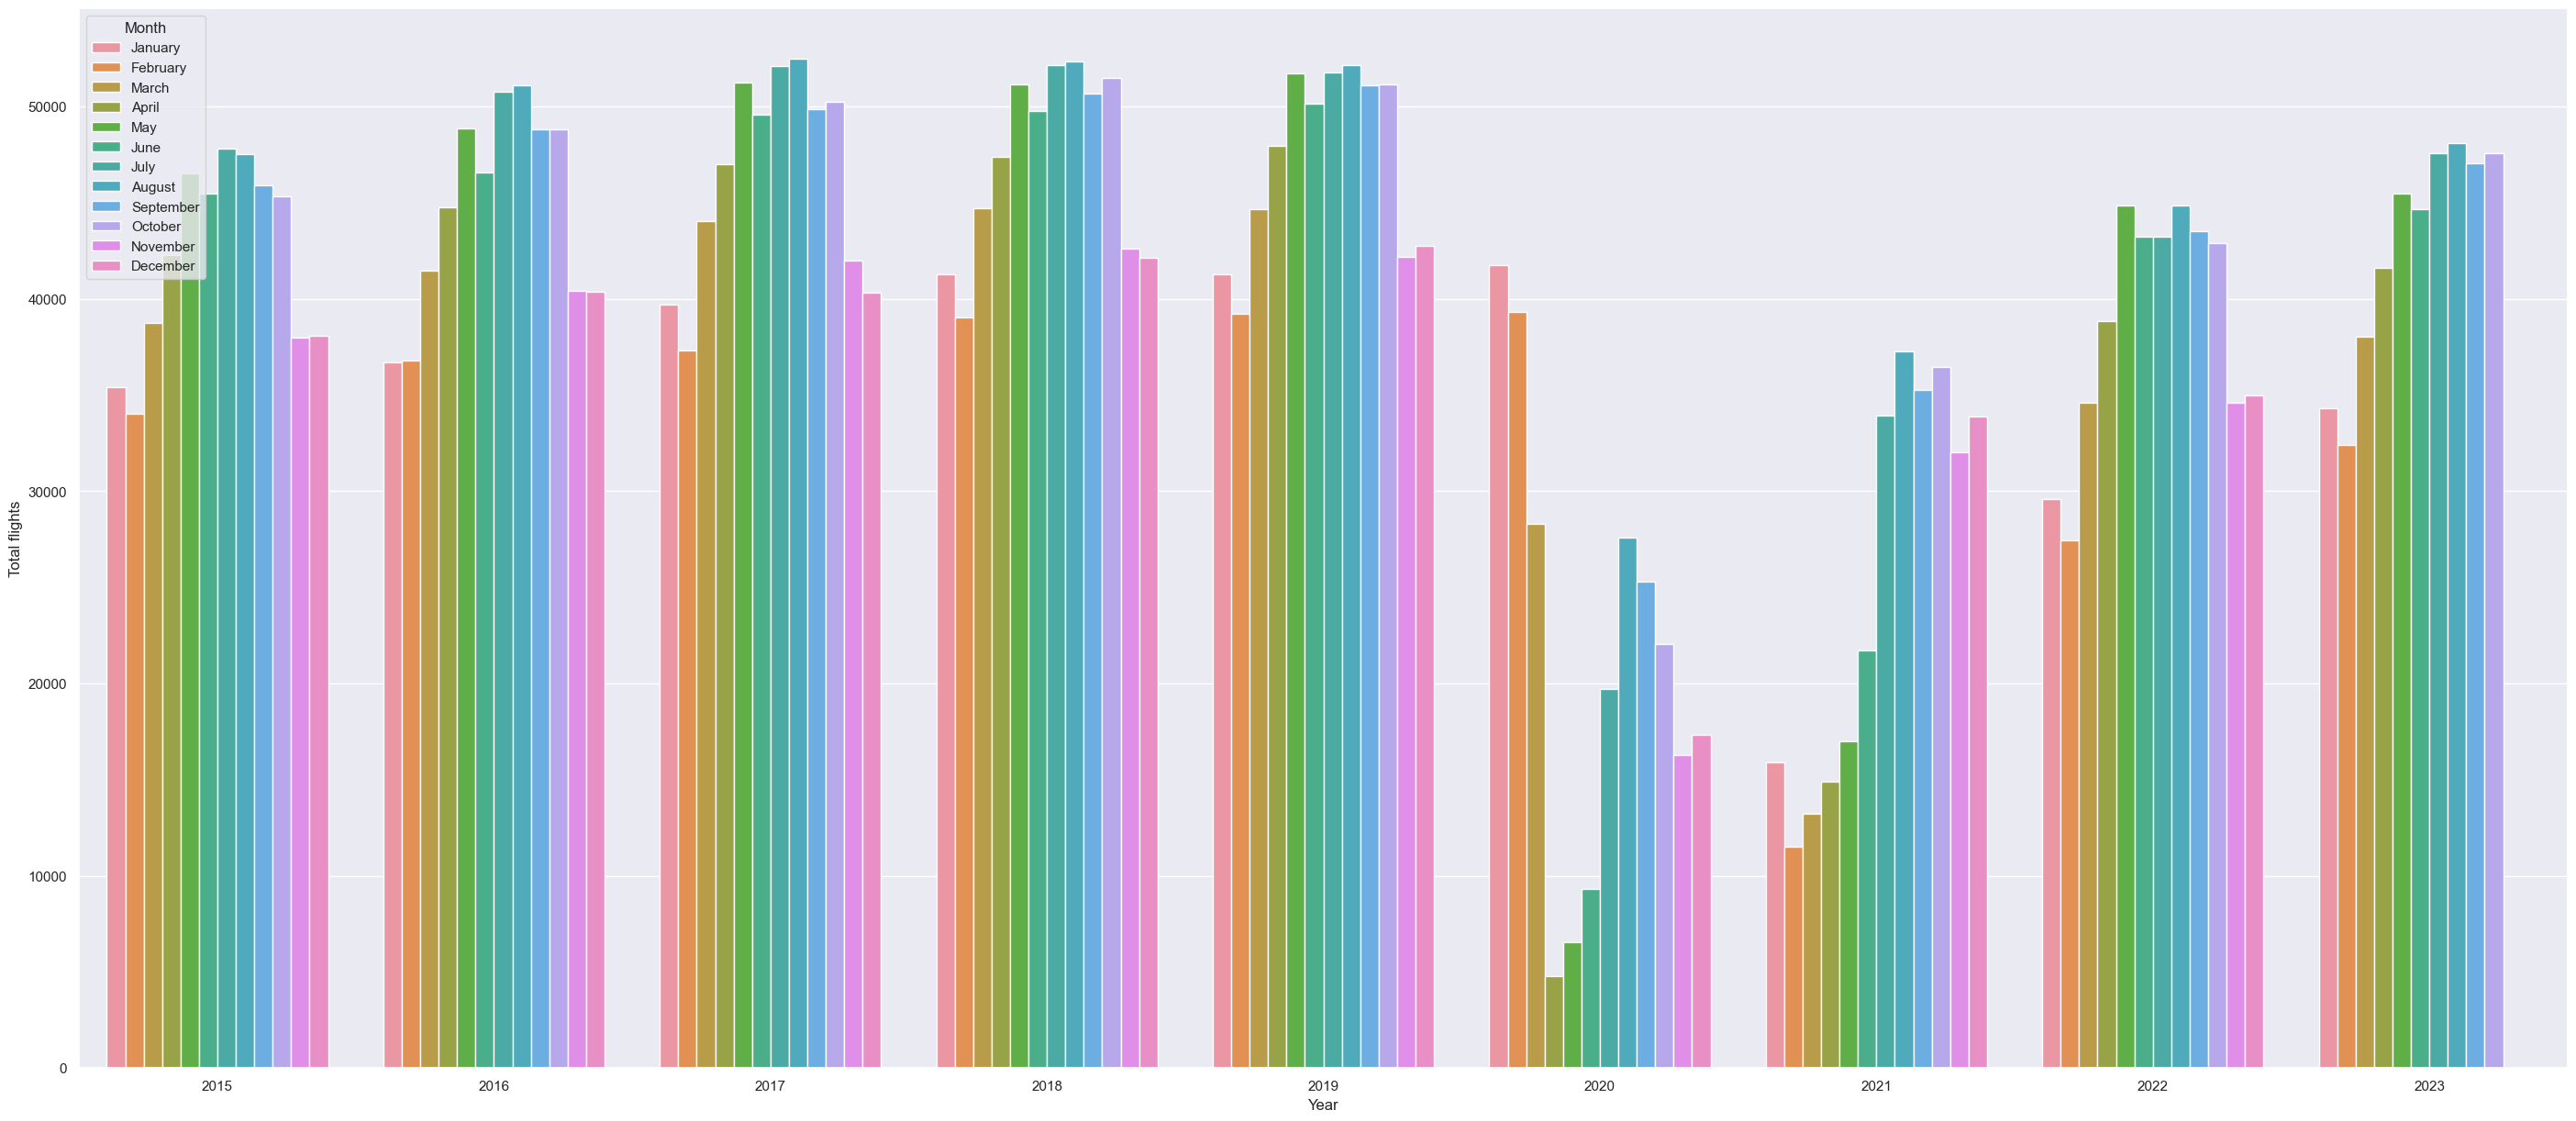

In [53]:
sns.set(rc={'figure.figsize':(35,15)}) #Understanding the total numbers through the years
sns.barplot(x=dfNdTotal.Year, y=dfNdTotal['Total flights'],hue=dfNdTotal['Month'])

<Axes: xlabel='Year', ylabel='Total passengers'>

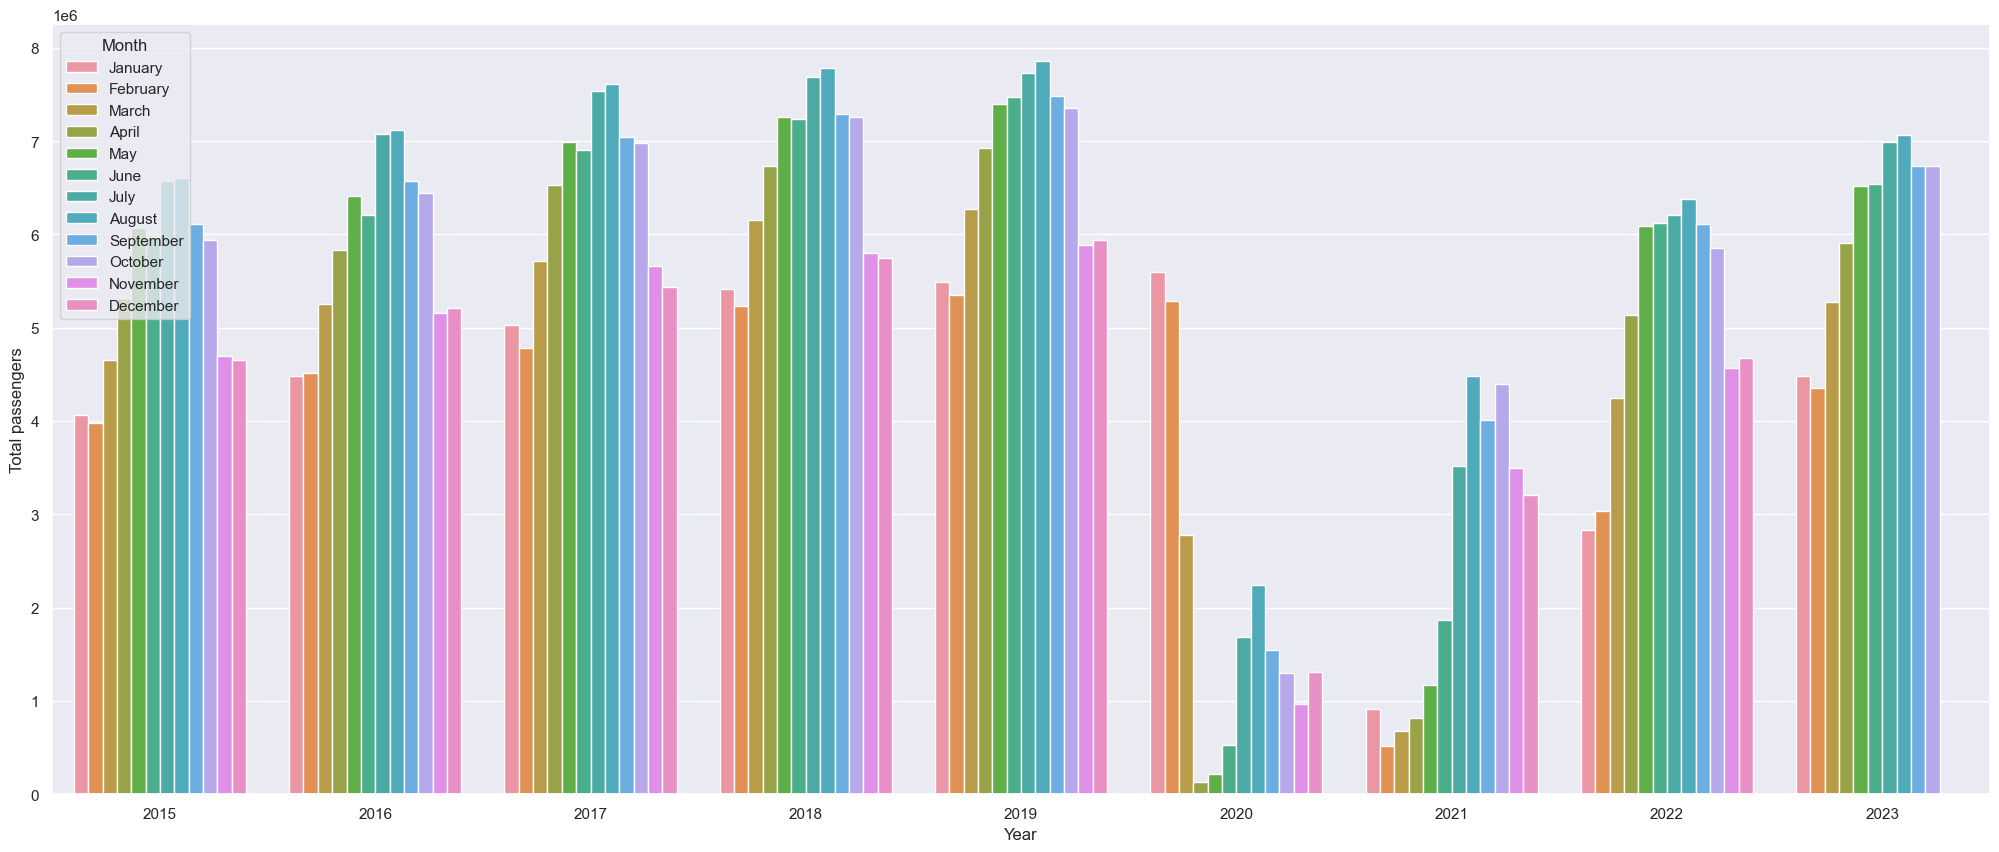

In [54]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfNdTotal.Year, y=dfNdTotal['Total passengers'],hue=dfNdTotal['Month'])

<Axes: xlabel='Year', ylabel='Total cargo'>

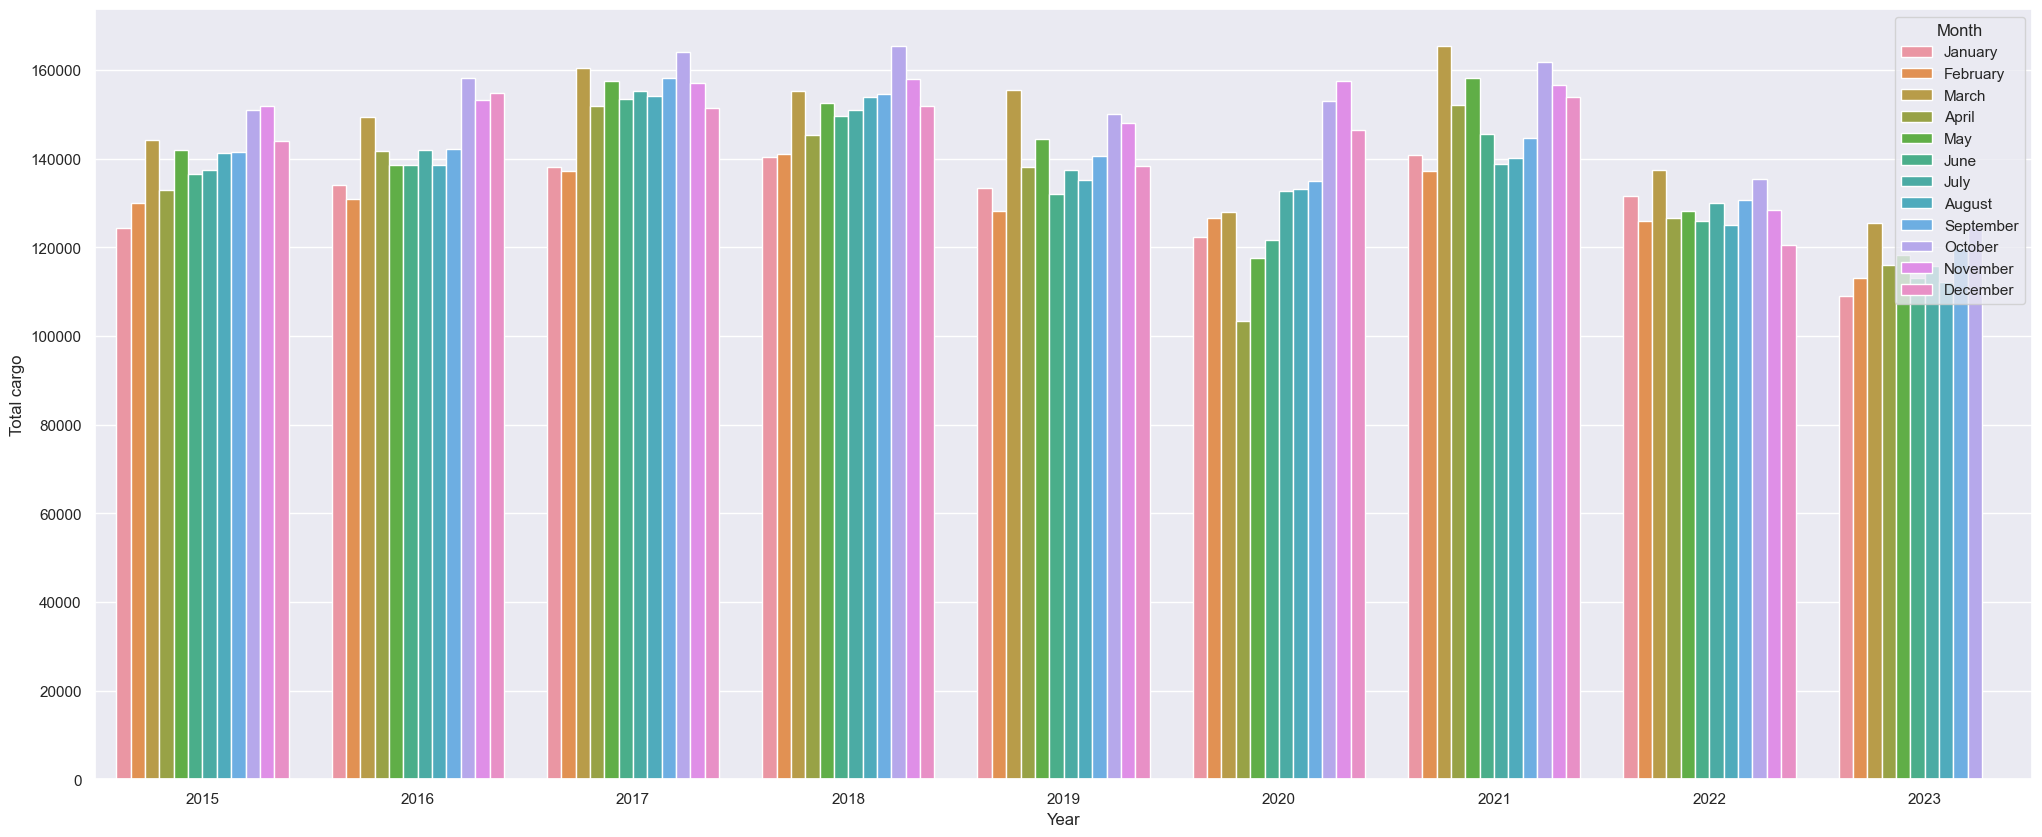

In [55]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfNdTotal.Year, y=dfNdTotal['Total cargo'],hue=dfNdTotal['Month'])

## Identyfing outliers

In [56]:
dfNdTotal.describe()

,Year,Cross-country flights,Local flights,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,1.060000e+02,106.000000,1.060000e+02,1.060000e+02,106.000000,1.060000e+02,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2018.924528,42567.537736,5471.424528,39407.584906,37808.632075,1598.952830,19700.849057,18904.594340,796.254717,19706.735849,18904.037736,802.698113,5.154742e+06,5.008521e+06,146221.009434,2.575355e+06,2.502742e+06,72612.396226,2.579387e+06,2.505779e+06,73608.613208,139863.622642,133989.018868,5874.622642,72488.952830,69352.198113,3136.745283,67374.698113,64636.915094,2737.849057
std,2.558638,11737.665871,1834.846940,11378.798059,10846.329727,922.812744,5688.640907,5427.443044,456.636253,5690.179514,5419.020755,467.614089,2.041924e+06,1.953402e+06,152472.613048,1.023215e+06,9.787878e+05,76424.977280,1.024779e+06,9.800060e+05,76997.716537,13921.220439,12878.170017,4555.671441,7015.208958,6567.768094,2297.283734,7423.041569,6798.698158,2293.702583
min,2015.000000,6093.000000,1991.000000,4759.000000,4175.000000,584.000000,2375.000000,2081.000000,294.000000,2384.000000,2094.000000,288.000000,1.337520e+05,1.295250e+05,1683.000000,7.477800e+04,7.143600e+04,702.000000,5.897400e+04,5.808900e+04,885.000000,103420.000000,96683.000000,2.000000,54036.000000,50340.000000,0.000000,49384.000000,46343.000000,0.000000
25%,2017.000000,38083.500000,4227.250000,35041.500000,34031.000000,933.500000,17524.250000,16996.250000,463.250000,17517.250000,17022.250000,448.500000,4.416754e+06,4.375093e+06,29932.250000,2.230804e+06,2.197025e+06,16189.250000,2.161742e+06,2.147282e+06,14117.500000,130246.000000,125435.750000,1313.500000,67260.250000,64233.250000,971.500000,62573.250000,60716.250000,408.500000
50%,2019.000000,44955.500000,5033.000000,42172.000000,41070.500000,1262.500000,21083.000000,20523.000000,619.000000,21089.000000,20547.500000,639.000000,5.729929e+06,5.577424e+06,93203.000000,2.837810e+06,2.789778e+06,47427.000000,2.849187e+06,2.766682e+06,46749.500000,140284.500000,133390.500000,6741.500000,72028.000000,68886.500000,3540.000000,68787.500000,64260.500000,2972.500000
75%,2021.000000,51031.750000,6895.250000,47554.750000,45794.750000,1918.000000,23777.750000,22871.250000,971.000000,23779.500000,22923.500000,958.250000,6.597852e+06,6.422651e+06,192866.000000,3.321395e+06,3.210377e+06,85491.750000,3.330332e+06,3.208148e+06,101958.750000,151950.250000,145573.250000,8156.500000,77681.750000,74030.750000,4329.750000,73156.250000,70585.000000,4087.500000
max,2023.000000,55894.000000,9705.000000,52466.000000,50496.000000,4781.000000,26227.000000,25253.000000,2380.000000,26239.000000,25243.000000,2413.000000,7.859458e+06,7.700001e+06,671138.000000,4.067875e+06,3.985949e+06,366499.000000,4.097156e+06,4.021431e+06,365970.000000,165457.000000,158779.000000,18866.000000,87809.000000,84514.000000,9011.000000,79683.000000,76902.000000,9856.000000


<Axes: >

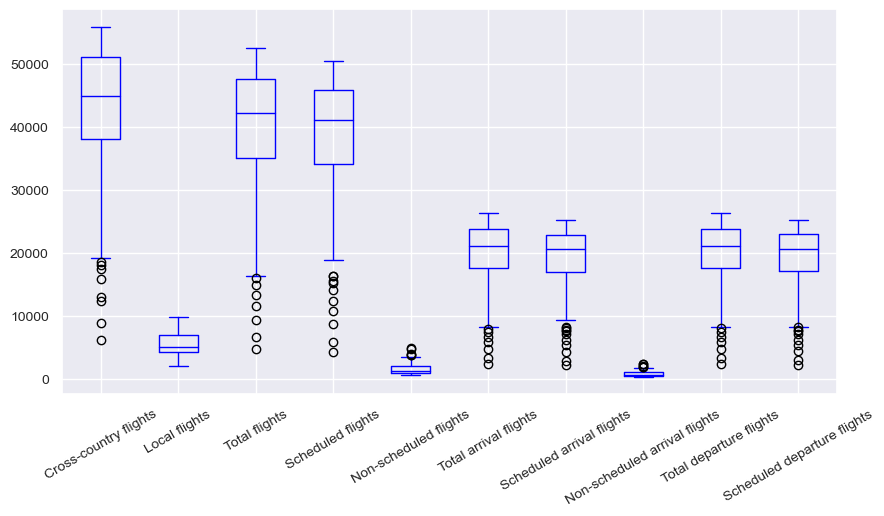

In [57]:
 #Identifying outliers for flights
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,3:13].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

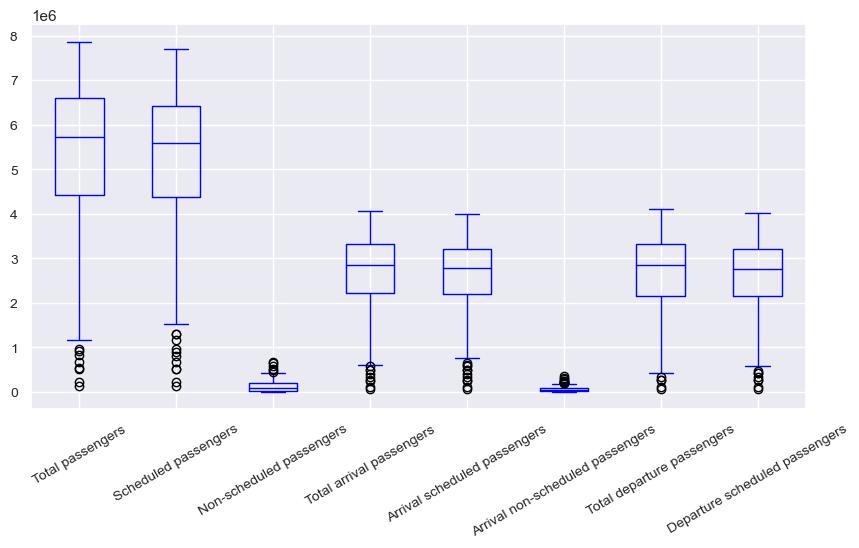

In [58]:
#Identifying outliers for passengers
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,14:22].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

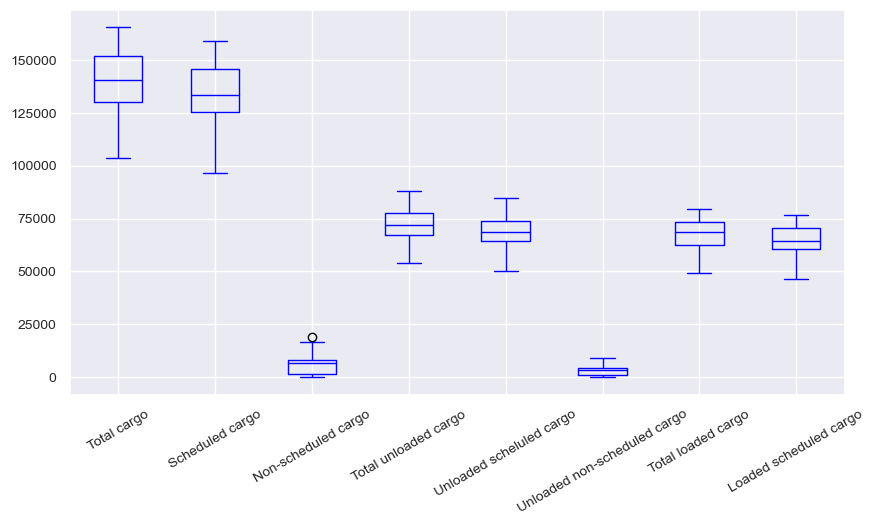

In [59]:
#Identifying outliers for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,23:31].boxplot(grid='true', color='blue',fontsize=10, rot=30)

In [60]:
dfNd[dfNd.index.duplicated()]

,Year,Month,Airports,Cross-country flights,Local flights,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo


In [61]:
dfNdTotal.head()

,Year,Month,Airports,Cross-country flights,Local flights,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo
210,2015,January,Total Dutch airports,37288,3315,35424,34028,1396,17679,16987,692,17745,17041,704,4067159,3951731,115428,2053582,1993942,59640,2013577,1957789,55788,124315,109954,14362,65897,58432,7465,58418,51521,6897
211,2015,February,Total Dutch airports,36279,4654,34013,32608,1405,17001,16320,681,17012,16288,724,3975652,3850191,125461,1963234,1901287,61947,2012418,1948904,63514,130082,113243,16839,67406,58672,8734,62676,54572,8105
212,2015,March,Total Dutch airports,41870,5089,38723,37208,1515,19371,18617,754,19352,18591,761,4651418,4522693,128725,2361147,2293347,67800,2290271,2229346,60925,144166,125300,18866,70732,61721,9011,73435,63579,9856
213,2015,April,Total Dutch airports,45402,5802,42263,40040,2223,21126,20014,1112,21137,20026,1111,5318300,5109064,209236,2592791,2509685,83106,2725509,2599379,126130,133041,120640,12401,68967,62965,6003,64074,57676,6398
214,2015,May,Total Dutch airports,49852,4453,46525,42848,3677,23258,21451,1807,23267,21397,1870,6064935,5584009,480926,3050274,2816270,234004,3014661,2767739,246922,142064,127631,14433,72729,65278,7451,69335,62353,6982


In [62]:
Q1 = dfNdTotal.iloc[:,1:].quantile(0.25)
Q3 = dfNdTotal.iloc[:,1:].quantile(0.75)
IQR = Q3-Q1
print(IQR)

Cross-country flights                   12948.25
Local flights                            2668.00
Total flights                           12513.25
Scheduled flights                       11763.75
Non-scheduled flights                     984.50
Total arrival flights                    6253.50
Scheduled arrival flights                5875.00
Non-scheduled arrival flights             507.75
Total departure flights                  6262.25
Scheduled departure flights              5901.25
Non-scheduled departure flights           509.75
Total passengers                      2181098.50
Scheduled passengers                  2047557.50
Non-scheduled passengers               162933.75
Total arrival passengers              1090591.00
Arrival scheduled passengers          1013352.25
Arrival non-scheduled passengers        69302.50
Total departure passengers            1168589.25
Departure scheduled passengers        1060866.25
Departure non-scheduled passengers      87841.25
Total cargo         

C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\439525147.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dfNdTotal.iloc[:,1:].quantile(0.25)
C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\439525147.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dfNdTotal.iloc[:,1:].quantile(0.75)


In [63]:
dfNdTotal = dfNdTotal[~((dfNdTotal.iloc[:,1:] < (Q1-1.5 * IQR)) |(dfNdTotal.iloc[:,1:] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\3577223539.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfNdTotal = dfNdTotal[~((dfNdTotal.iloc[:,1:] < (Q1-1.5 * IQR)) |(dfNdTotal.iloc[:,1:] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: >

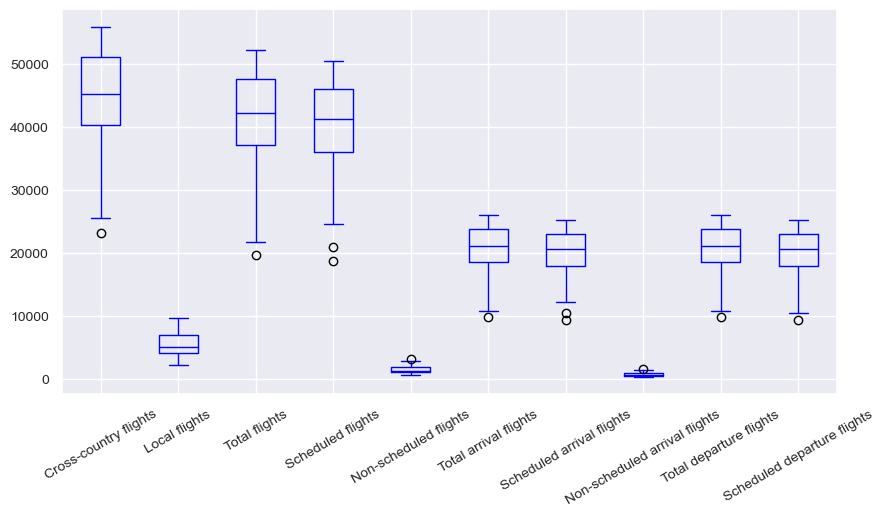

In [64]:
#Confirming outliers were nearly eliminated for flights
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,3:13].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

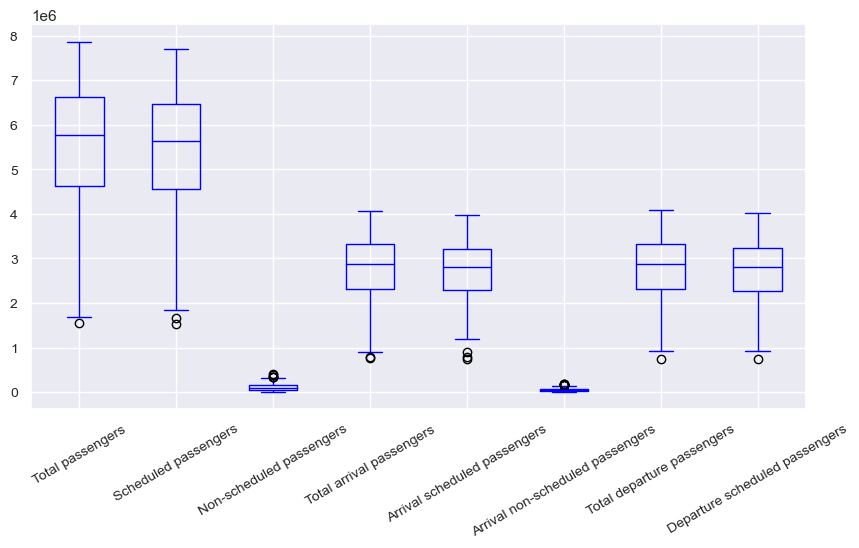

In [65]:
#Confirming most outliers were eliminated for passengers
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,14:22].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

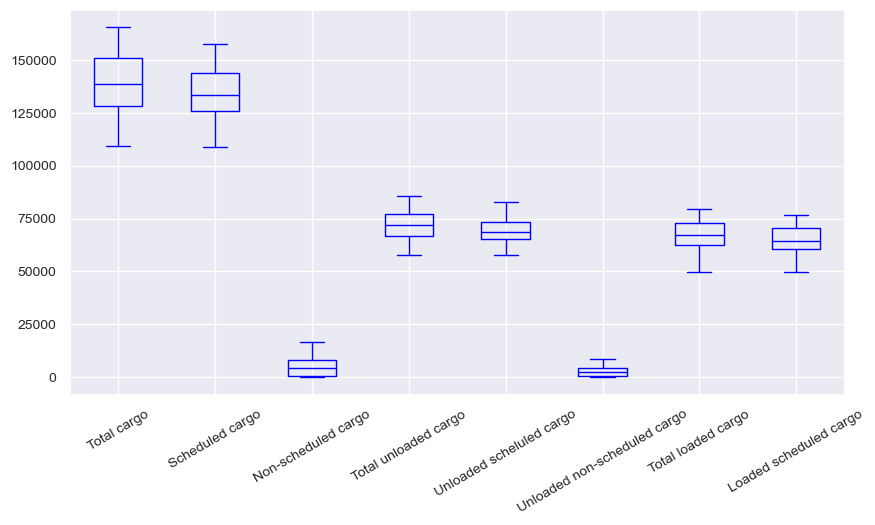

In [66]:
#Confirming outliers were dropped for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfNdTotal.iloc[:,23:31].boxplot(grid='true', color='blue',fontsize=10, rot=30)

In [67]:
dfNdTotal.head(15)

,Year,Month,Airports,Cross-country flights,Local flights,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo
210,2015,January,Total Dutch airports,37288,3315,35424,34028,1396,17679,16987,692,17745,17041,704,4067159,3951731,115428,2053582,1993942,59640,2013577,1957789,55788,124315,109954,14362,65897,58432,7465,58418,51521,6897
211,2015,February,Total Dutch airports,36279,4654,34013,32608,1405,17001,16320,681,17012,16288,724,3975652,3850191,125461,1963234,1901287,61947,2012418,1948904,63514,130082,113243,16839,67406,58672,8734,62676,54572,8105
213,2015,April,Total Dutch airports,45402,5802,42263,40040,2223,21126,20014,1112,21137,20026,1111,5318300,5109064,209236,2592791,2509685,83106,2725509,2599379,126130,133041,120640,12401,68967,62965,6003,64074,57676,6398
219,2015,October,Total Dutch airports,48396,5054,45332,42435,2897,22645,21226,1419,22687,21209,1478,5940890,5611111,329779,2997692,2818504,179188,2943198,2792607,150591,151020,135937,15083,76284,68797,7487,74736,67140,7596
220,2015,November,Total Dutch airports,40513,3904,37962,36683,1279,18996,18354,642,18966,18329,637,4697506,4605773,91733,2364328,2314023,50305,2333178,2291750,41428,151993,138236,13757,79076,71873,7203,72916,66362,6554
221,2015,December,Total Dutch airports,40542,3630,38065,36922,1143,19047,18478,569,19018,18444,574,4657214,4575777,81437,2292144,2252904,39240,2365070,2322873,42197,143898,131782,12116,74660,68223,6437,69238,63559,5679
223,2016,January,Total Dutch airports,38706,3724,36709,35694,1015,18340,17838,502,18369,17856,513,4487365,4409684,77681,2263317,2223096,40221,2224048,2186588,37460,134104,123516,10588,71885,66052,5833,62219,57464,4755
224,2016,February,Total Dutch airports,39249,3889,36774,35687,1087,18388,17849,539,18386,17838,548,4510127,4432831,77296,2227376,2188477,38899,2282751,2244354,38397,130919,119885,11034,69403,63498,5906,61516,56387,5128
225,2016,March,Total Dutch airports,44730,4757,41451,40123,1328,20720,20056,664,20731,20067,664,5249454,5159885,89569,2646268,2601831,44437,2603186,2558054,45132,149453,139098,10355,78474,73203,5272,70979,65896,5083
226,2016,April,Total Dutch airports,48235,5617,44736,42925,1811,22366,21453,913,22370,21472,898,5837141,5676589,160552,2826735,2763416,63319,3010406,2913173,97233,141790,131933,9858,74367,69091,5277,67423,62842,4581


C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\2113943575.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= dfNdTotal.corr()


,Year,Cross-country flights,Local flights,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo
Year,1.000000,-0.178884,0.667844,-0.241182,-0.219039,-0.399408,-0.241402,-0.221243,-0.380046,-0.240960,-0.216819,-0.415493,-0.140770,-0.115666,-0.436953,-0.128592,-0.103294,-0.434667,-0.151343,-0.126757,-0.431676,-0.593883,-0.369448,-0.838288,-0.557983,-0.324577,-0.820672,-0.594891,-0.386796,-0.847560
Cross-country flights,-0.178884,1.000000,-0.077325,0.994789,0.990972,0.686263,0.994740,0.990719,0.688467,0.994827,0.991160,0.679395,0.979736,0.972469,0.695654,0.976325,0.968866,0.691006,0.972885,0.966234,0.688228,0.218972,0.262453,-0.042293,0.132106,0.181447,-0.080230,0.285677,0.317777,-0.002590
Local flights,0.667844,-0.077325,1.000000,-0.169742,-0.184166,0.048474,-0.170498,-0.186217,0.064163,-0.168984,-0.182102,0.032879,-0.131871,-0.134095,-0.048796,-0.117796,-0.118664,-0.058396,-0.144413,-0.148031,-0.038683,-0.360588,-0.256052,-0.420653,-0.343368,-0.234207,-0.414551,-0.357084,-0.259977,-0.422466
Total flights,-0.241182,0.994789,-0.169742,1.000000,0.997728,0.672680,0.999995,0.997741,0.672247,0.999995,0.997648,0.668471,0.980928,0.973917,0.692793,0.977539,0.970145,0.690807,0.974042,0.967834,0.682845,0.248436,0.279642,0.002470,0.163671,0.200681,-0.036097,0.311694,0.332157,0.042346
Scheduled flights,-0.219039,0.990972,-0.184166,0.997728,1.000000,0.621300,0.997751,0.999967,0.621168,0.997695,0.999967,0.617151,0.984287,0.980879,0.644362,0.981693,0.977843,0.643210,0.976580,0.973996,0.634437,0.232817,0.274896,-0.033413,0.150365,0.198830,-0.071120,0.294815,0.325159,0.005957
Non-scheduled flights,-0.399408,0.686263,0.048474,0.672680,0.621300,1.000000,0.672369,0.621817,0.996413,0.672984,0.620741,0.996606,0.598483,0.554370,0.980641,0.587553,0.543841,0.970196,0.603045,0.559212,0.973933,0.332460,0.233256,0.395690,0.252144,0.150312,0.361263,0.387275,0.292005,0.427073
Total arrival flights,-0.241402,0.994740,-0.170498,0.999995,0.997751,0.672369,1.000000,0.997773,0.671953,0.999980,0.997662,0.668145,0.980937,0.973950,0.692467,0.977423,0.970051,0.690428,0.974176,0.967993,0.682575,0.249005,0.280345,0.002303,0.164136,0.201287,-0.036291,0.312326,0.332902,0.042208
Scheduled arrival flights,-0.221243,0.990719,-0.186217,0.997741,0.999967,0.621817,0.997773,1.000000,0.621053,0.997699,0.999866,0.618279,0.983763,0.980296,0.644870,0.981517,0.977587,0.644239,0.975717,0.973096,0.634433,0.235607,0.277497,-0.031882,0.153143,0.201446,-0.069659,0.297469,0.327592,0.007545
Non-scheduled arrival flights,-0.380046,0.688467,0.064163,0.672247,0.621168,0.996413,0.671953,0.621053,1.000000,0.672533,0.621241,0.986065,0.603519,0.559911,0.976613,0.587158,0.544174,0.959658,0.613399,0.569858,0.976265,0.309907,0.213063,0.381011,0.228283,0.128510,0.346966,0.367089,0.274418,0.412156
Total departure flights,-0.240960,0.994827,-0.168984,0.999995,0.997695,0.672984,0.999980,0.997699,0.672533,1.000000,0.997624,0.668789,0.980908,0.973873,0.693112,0.977645,0.970229,0.691179,0.973899,0.967665,0.683107,0.247865,0.278937,0.002637,0.163203,0.200073,-0.035903,0.311060,0.331409,0.042483


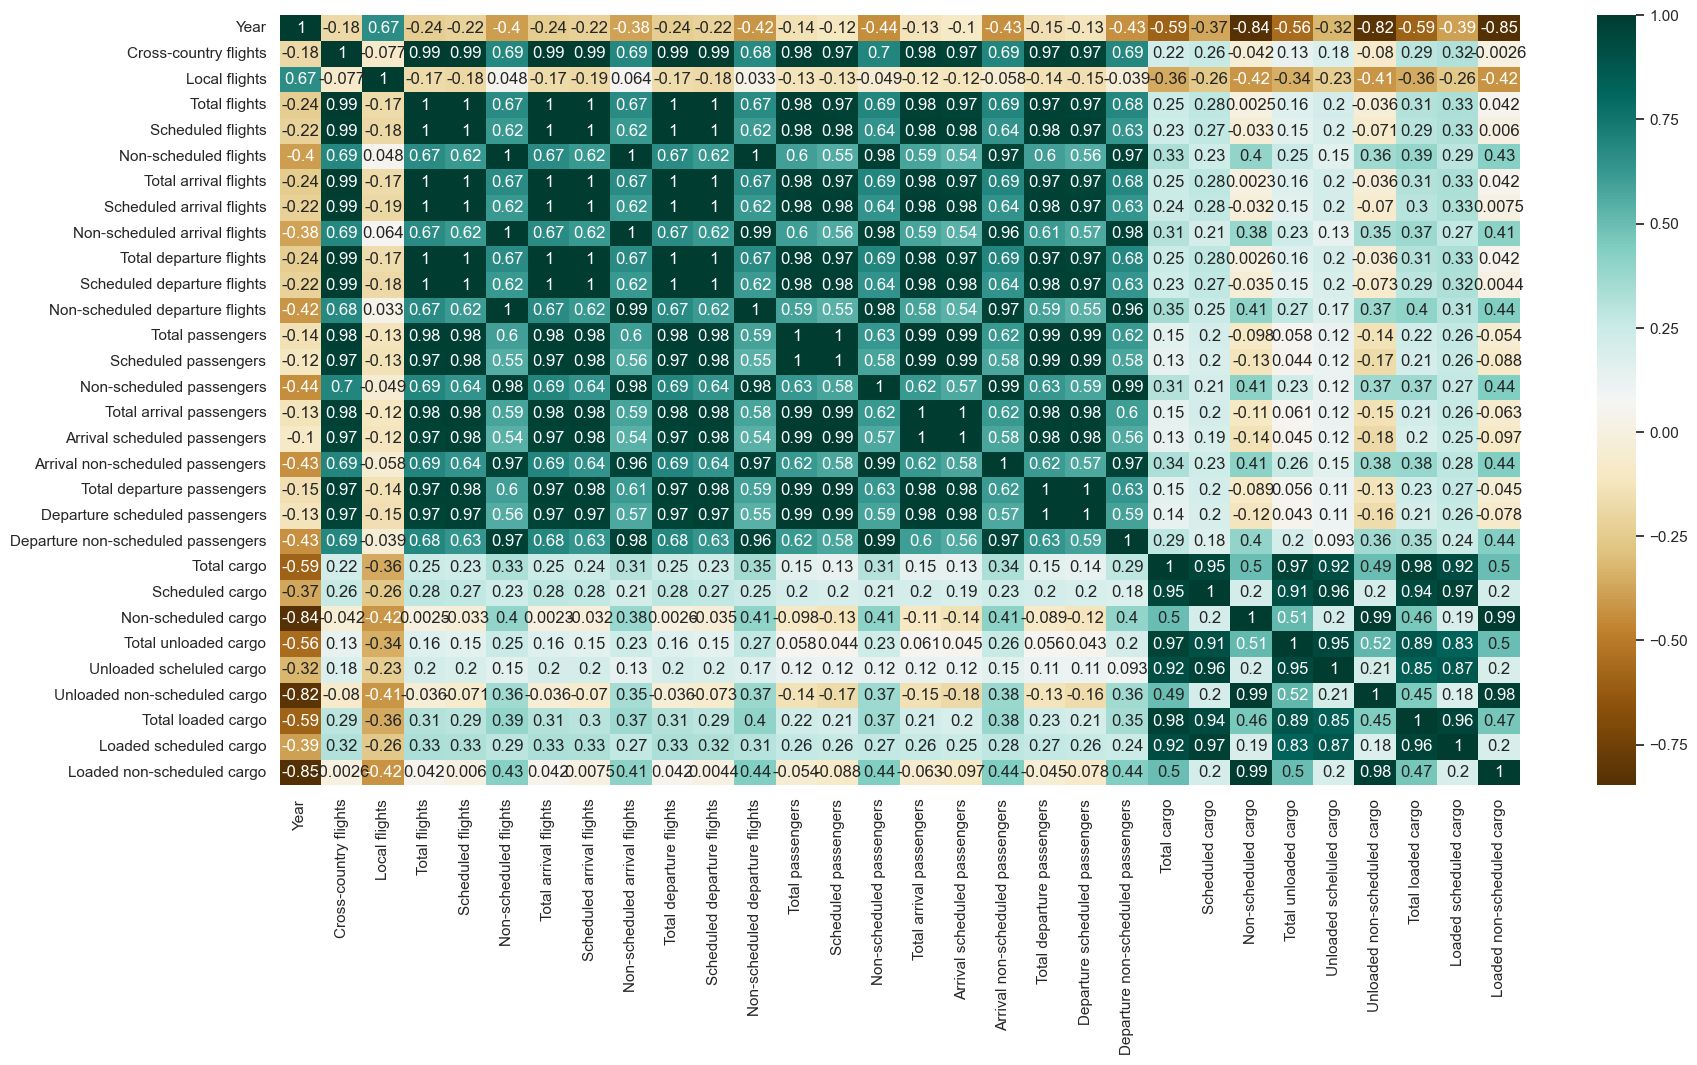

In [68]:
plt.figure(figsize=(20,10))
c= dfNdTotal.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

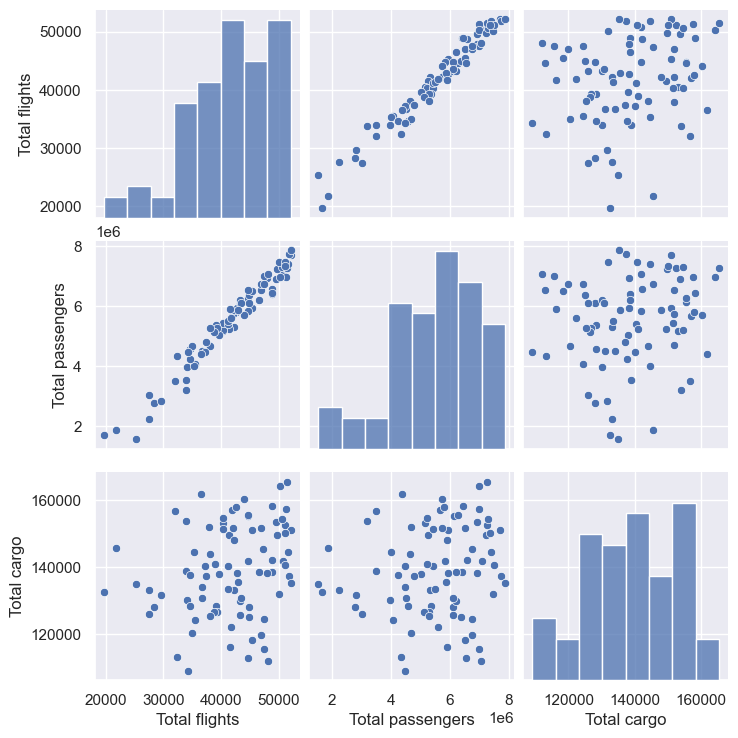

In [69]:
sns.pairplot(dfNdTotal[['Total flights','Total passengers','Total cargo']])

In [70]:
dfIr = pd.read_csv('Info_Ireland.csv') #Information for Irish airports
dfIr.head(15)

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE
0,Passengers,2015M01,All main airports,All Countries,All directions,All flights,Thousand,1702.0
1,Passengers,2015M01,All main airports,All Countries,All directions,Scheduled,Thousand,1676.1
2,Passengers,2015M01,All main airports,All Countries,All directions,Unscheduled,Thousand,26.0
3,Passengers,2015M01,All main airports,All Countries,Arrival,All flights,Thousand,837.3
4,Passengers,2015M01,All main airports,All Countries,Arrival,Scheduled,Thousand,823.8
5,Passengers,2015M01,All main airports,All Countries,Arrival,Unscheduled,Thousand,13.6
6,Passengers,2015M01,All main airports,All Countries,Departure,All flights,Thousand,864.7
7,Passengers,2015M01,All main airports,All Countries,Departure,Scheduled,Thousand,852.3
8,Passengers,2015M01,All main airports,All Countries,Departure,Unscheduled,Thousand,12.4
9,Passengers,2015M01,All main airports,Ireland (domestic),All directions,All flights,Thousand,7.6


In [71]:
dfIr.tail()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE
946237,Commercial Flights,2023M03,Shannon,Oceania and Polar regions (1),Arrival,Scheduled,Thousand,0.0
946238,Commercial Flights,2023M03,Shannon,Oceania and Polar regions (1),Arrival,Unscheduled,Thousand,0.0
946239,Commercial Flights,2023M03,Shannon,Oceania and Polar regions (1),Departure,All flights,Thousand,0.0
946240,Commercial Flights,2023M03,Shannon,Oceania and Polar regions (1),Departure,Scheduled,Thousand,0.0
946241,Commercial Flights,2023M03,Shannon,Oceania and Polar regions (1),Departure,Unscheduled,Thousand,0.0


In [72]:
dfIr['Statistic Label'].unique()

array(['Passengers', 'Freight', 'Commercial Flights'], dtype=object)

In [73]:
dfIr['Month'].unique()

array(['2015M01', '2015M02', '2015M03', '2015M04', '2015M05', '2015M06',
       '2015M07', '2015M08', '2015M09', '2015M10', '2015M11', '2015M12',
       '2016M01', '2016M02', '2016M03', '2016M04', '2016M05', '2016M06',
       '2016M07', '2016M08', '2016M09', '2016M10', '2016M11', '2016M12',
       '2017M01', '2017M02', '2017M03', '2017M04', '2017M05', '2017M06',
       '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12',
       '2018M01', '2018M02', '2018M03', '2018M04', '2018M05', '2018M06',
       '2018M07', '2018M08', '2018M09', '2018M10', '2018M11', '2018M12',
       '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09', '2020M10', '2020M11', '2020M12',
       '2021M01', '2021M02', '2021M03', '2021M04', '2021M05', '2021M06',
       '2021M07', '2021M08', '2021M09', '2021M10', 

In [74]:
dfIr['Country'].unique()

array(['All Countries', 'Ireland (domestic)', 'Europe (2)',
       'EU28 excluding Ireland', 'Austria', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Canary Islands', 'Sweden', 'United Kingdom (1)', 'England',
       'Northern Ireland', 'Scotland', 'Wales', 'Other UK (1)', 'Iceland',
       'Norway', 'Russia', 'Serbia', 'Switzerland', 'Turkey',
       'Other Europe (25)', 'America (4)', 'Canada', 'United States',
       'Other America (5)', 'Africa (9)', 'Egypt', 'Morocco', 'Tunisia',
       'Other Africa (6)', 'Asia (8)', 'Bahrain', 'Israel',
       'United Arab Emirates', 'Other Asian countries (4)',
       'Oceania and Polar regions (1)'], dtype=object)

In [75]:
dfIr['Country'].value_counts()

All Countries                    16038
America (4)                      16038
England                          16038
Northern Ireland                 16038
Scotland                         16038
Wales                            16038
Other UK (1)                     16038
Iceland                          16038
Norway                           16038
Russia                           16038
Serbia                           16038
Switzerland                      16038
Turkey                           16038
Other Europe (25)                16038
Canada                           16038
Sweden                           16038
United States                    16038
Other America (5)                16038
Africa (9)                       16038
Egypt                            16038
Morocco                          16038
Tunisia                          16038
Other Africa (6)                 16038
Asia (8)                         16038
Bahrain                          16038
Israel                   

In [76]:
#dfIrTotal = dfIr[dfIr['Country']=='All Countries']

In [77]:
dfIr.shape

(946242, 8)

In [78]:
dfIr[['Year','Month']] = dfIr['Month'].str.split('M', expand=True)

In [79]:
dfIr.head()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE,Year
0,Passengers,01,All main airports,All Countries,All directions,All flights,Thousand,1702.0,2015
1,Passengers,01,All main airports,All Countries,All directions,Scheduled,Thousand,1676.1,2015
2,Passengers,01,All main airports,All Countries,All directions,Unscheduled,Thousand,26.0,2015
3,Passengers,01,All main airports,All Countries,Arrival,All flights,Thousand,837.3,2015
4,Passengers,01,All main airports,All Countries,Arrival,Scheduled,Thousand,823.8,2015


In [80]:
dfIr.loc[dfIr["Month"] == "01", "Month"] = "January" #Changing the months values from numbers to name of month
dfIr.loc[dfIr["Month"] == "02", "Month"] = "February"
dfIr.loc[dfIr["Month"] == "03", "Month"] = "March"
dfIr.loc[dfIr["Month"] == "04", "Month"] = "April"
dfIr.loc[dfIr["Month"] == "05", "Month"] = "May"
dfIr.loc[dfIr["Month"] == "06", "Month"] = "June"
dfIr.loc[dfIr["Month"] == "07", "Month"] = "July"
dfIr.loc[dfIr["Month"] == "08", "Month"] = "August"
dfIr.loc[dfIr["Month"] == "09", "Month"] = "September"
dfIr.loc[dfIr["Month"] == "10", "Month"] = "October"
dfIr.loc[dfIr["Month"] == "11", "Month"] = "November"
dfIr.loc[dfIr["Month"] == "12", "Month"] = "December"

In [81]:
dfIr.head()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE,Year
0,Passengers,January,All main airports,All Countries,All directions,All flights,Thousand,1702.0,2015
1,Passengers,January,All main airports,All Countries,All directions,Scheduled,Thousand,1676.1,2015
2,Passengers,January,All main airports,All Countries,All directions,Unscheduled,Thousand,26.0,2015
3,Passengers,January,All main airports,All Countries,Arrival,All flights,Thousand,837.3,2015
4,Passengers,January,All main airports,All Countries,Arrival,Scheduled,Thousand,823.8,2015


In [82]:
dfIr.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [83]:
dfIr['Airports in Ireland'].unique()

array(['All main airports', 'Cork', 'Dublin', 'Kerry', 'Knock', 'Shannon'],
      dtype=object)

In [84]:
dfIrTotal = dfIr[dfIr['Country']=='All Countries']

In [85]:
dfIrTotal = dfIrTotal[dfIrTotal['Airports in Ireland']=='All main airports']

In [86]:
dfIrTotal.head()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE,Year
0,Passengers,January,All main airports,All Countries,All directions,All flights,Thousand,1702.0,2015
1,Passengers,January,All main airports,All Countries,All directions,Scheduled,Thousand,1676.1,2015
2,Passengers,January,All main airports,All Countries,All directions,Unscheduled,Thousand,26.0,2015
3,Passengers,January,All main airports,All Countries,Arrival,All flights,Thousand,837.3,2015
4,Passengers,January,All main airports,All Countries,Arrival,Scheduled,Thousand,823.8,2015


In [87]:
dfIrTotal.shape

(2673, 9)

In [88]:
dfIrTotal.Country.unique()


array(['All Countries'], dtype=object)

In [89]:
dfIrTotal['Airports in Ireland'].unique()

array(['All main airports'], dtype=object)

In [90]:
dfIrTotal = dfIrTotal.drop(['Country','Airports in Ireland'],axis=1)

In [91]:
dfIrTotal.UNIT.unique() #Units are in thousands, so the value column will be multiplied and the UNIT column dropped

array(['Thousand', '000 Tonnes'], dtype=object)

In [92]:
dfIrTotal['VALUE'] = dfIrTotal['VALUE'].apply(lambda x: x*1000)

In [93]:
dfIrTotal.drop('UNIT',axis=1)

,Statistic Label,Month,Direction,Flight Type,VALUE,Year
0,Passengers,January,All directions,All flights,1702000.0,2015
1,Passengers,January,All directions,Scheduled,1676100.0,2015
2,Passengers,January,All directions,Unscheduled,26000.0,2015
3,Passengers,January,Arrival,All flights,837300.0,2015
4,Passengers,January,Arrival,Scheduled,823800.0,2015
...,...,...,...,...,...,...
943060,Commercial Flights,March,Arrival,Scheduled,10200.0,2023
943061,Commercial Flights,March,Arrival,Unscheduled,100.0,2023
943062,Commercial Flights,March,Departure,All flights,10300.0,2023
943063,Commercial Flights,March,Departure,Scheduled,10300.0,2023


In [94]:
dfIrTotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673 entries, 0 to 943064
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  2673 non-null   object 
 1   Month            2673 non-null   object 
 2   Direction        2673 non-null   object 
 3   Flight Type      2673 non-null   object 
 4   UNIT             2673 non-null   object 
 5   VALUE            2673 non-null   float64
 6   Year             2673 non-null   object 
dtypes: float64(1), object(6)
memory usage: 167.1+ KB


In [95]:
dfIrTotal.insert(0, 'Year', dfIrTotal.pop('Year'))
dfIrTotal.insert(1, 'Month', dfIrTotal.pop('Month'))

In [96]:
dfIrTotal.shape

(2673, 7)

In [97]:
dfIrTotal = dfIrTotal.pivot_table('VALUE', ['Year', 'Month','Statistic Label','Direction'], 'Flight Type')

In [98]:
dfIrTotal.head(10)

Flight Type                                    All flights  Scheduled  \
Year Month  Statistic Label    Direction                                
2015 April  Commercial Flights All directions      18700.0    18400.0   
                               Arrival              9400.0     9200.0   
                               Departure            9300.0     9200.0   
            Freight            All directions      12200.0    12200.0   
                               Arrival              6300.0     6300.0   
                               Departure            5800.0     5800.0   
            Passengers         All directions    2398400.0  2360200.0   
                               Arrival           1214100.0  1194300.0   
                               Departure         1184300.0  1165900.0   
     August Commercial Flights All directions      21800.0    21200.0   

Flight Type                                    Unscheduled  
Year Month  Statistic Label    Direction                    
2015 April  Commercial Flights All directions        300.0  
                               Arrival               200.0  
                               Departure             200.0  
            Freight            All directions          0.0  
                               Arrival                 0.0  
                               Departure               0.0  
            Passengers         All directions      38200.0  
                               Arrival             19800.0  
                               Departure           18400.0  
     August Commercial Flights All directions        600.0

In [99]:
dfIrTotal.reset_index()

Flight Type,Year,Month,Statistic Label,Direction,All flights,Scheduled,Unscheduled
0,2015,April,Commercial Flights,All directions,18700.0,18400.0,300.0
1,2015,April,Commercial Flights,Arrival,9400.0,9200.0,200.0
2,2015,April,Commercial Flights,Departure,9300.0,9200.0,200.0
3,2015,April,Freight,All directions,12200.0,12200.0,0.0
4,2015,April,Freight,Arrival,6300.0,6300.0,0.0
...,...,...,...,...,...,...,...
886,2023,March,Freight,Arrival,7400.0,7400.0,0.0
887,2023,March,Freight,Departure,6500.0,6400.0,100.0
888,2023,March,Passengers,All directions,2843700.0,2825000.0,18700.0
889,2023,March,Passengers,Arrival,1416400.0,1406500.0,9900.0


In [100]:
dfIrTotal = dfIrTotal.pivot_table(index=['Year','Month','Statistic Label'],columns='Direction', fill_value=0)
dfIrTotal.columns = dfIrTotal.columns.map('{0[1]}_{0[0]}'.format)
dfIrTotal = dfIrTotal.sort_index(1).reset_index()

C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\3514521724.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  dfIrTotal = dfIrTotal.sort_index(1).reset_index()


In [101]:
dfIrTotal.head()

,Year,Month,Statistic Label,All directions_All flights,All directions_Scheduled,All directions_Unscheduled,Arrival_All flights,Arrival_Scheduled,Arrival_Unscheduled,Departure_All flights,Departure_Scheduled,Departure_Unscheduled
0,2015,April,Commercial Flights,18700,18400,300,9400,9200,200,9300,9200,200
1,2015,April,Freight,12200,12200,0,6300,6300,0,5800,5800,0
2,2015,April,Passengers,2398400,2360200,38200,1214100,1194300,19800,1184300,1165900,18400
3,2015,August,Commercial Flights,21800,21200,600,10900,10600,300,10900,10600,300
4,2015,August,Freight,12300,12300,0,6500,6500,0,5800,5800,0


In [102]:
dfIrTotal = dfIrTotal.pivot_table(index=['Year','Month'],columns='Statistic Label', fill_value=0)
dfIrTotal.columns = dfIrTotal.columns.map('{0[1]}_{0[0]}'.format)
dfIrTotal = dfIrTotal.sort_index(1).reset_index()

C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\2222773139.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  dfIrTotal = dfIrTotal.sort_index(1).reset_index()


In [103]:
dfIrTotal.head()

,Year,Month,Commercial Flights_All directions_All flights,Commercial Flights_All directions_Scheduled,Commercial Flights_All directions_Unscheduled,Commercial Flights_Arrival_All flights,Commercial Flights_Arrival_Scheduled,Commercial Flights_Arrival_Unscheduled,Commercial Flights_Departure_All flights,Commercial Flights_Departure_Scheduled,Commercial Flights_Departure_Unscheduled,Freight_All directions_All flights,Freight_All directions_Scheduled,Freight_All directions_Unscheduled,Freight_Arrival_All flights,Freight_Arrival_Scheduled,Freight_Arrival_Unscheduled,Freight_Departure_All flights,Freight_Departure_Scheduled,Freight_Departure_Unscheduled,Passengers_All directions_All flights,Passengers_All directions_Scheduled,Passengers_All directions_Unscheduled,Passengers_Arrival_All flights,Passengers_Arrival_Scheduled,Passengers_Arrival_Unscheduled,Passengers_Departure_All flights,Passengers_Departure_Scheduled,Passengers_Departure_Unscheduled
0,2015,April,18700,18400,300,9400,9200,200,9300,9200,200,12200,12200,0,6300,6300,0,5800,5800,0,2398400,2360200,38200,1214100,1194300,19800,1184300,1165900,18400
1,2015,August,21800,21200,600,10900,10600,300,10900,10600,300,12300,12300,0,6500,6500,0,5800,5800,0,3166500,3089100,77500,1606800,1566600,40100,1559800,1522400,37300
2,2015,December,17000,16800,200,8500,8400,100,8500,8400,100,13400,13300,100,7200,7100,0,6200,6200,100,2052600,2032600,20000,1027100,1015900,11200,1025500,1016700,8800
3,2015,February,14800,14600,300,7400,7300,100,7400,7300,100,11000,11000,0,5900,5900,0,5100,5100,0,1719400,1686800,32700,866100,849400,16700,853300,837400,16000
4,2015,January,15700,15400,200,7900,7700,100,7800,7700,100,11600,11600,0,6500,6500,0,5100,5100,0,1702000,1676100,26000,837300,823800,13600,864700,852300,12400


In [104]:
list(dfIrTotal.columns)

['Year',
 'Month',
 'Commercial Flights_All directions_All flights',
 'Commercial Flights_All directions_Scheduled',
 'Commercial Flights_All directions_Unscheduled',
 'Commercial Flights_Arrival_All flights',
 'Commercial Flights_Arrival_Scheduled',
 'Commercial Flights_Arrival_Unscheduled',
 'Commercial Flights_Departure_All flights',
 'Commercial Flights_Departure_Scheduled',
 'Commercial Flights_Departure_Unscheduled',
 'Freight_All directions_All flights',
 'Freight_All directions_Scheduled',
 'Freight_All directions_Unscheduled',
 'Freight_Arrival_All flights',
 'Freight_Arrival_Scheduled',
 'Freight_Arrival_Unscheduled',
 'Freight_Departure_All flights',
 'Freight_Departure_Scheduled',
 'Freight_Departure_Unscheduled',
 'Passengers_All directions_All flights',
 'Passengers_All directions_Scheduled',
 'Passengers_All directions_Unscheduled',
 'Passengers_Arrival_All flights',
 'Passengers_Arrival_Scheduled',
 'Passengers_Arrival_Unscheduled',
 'Passengers_Departure_All flights',


In [105]:
dfIrTotal = dfIrTotal.rename(columns={
 'Commercial Flights_All directions_All flights':'Total flights',
 'Commercial Flights_All directions_Scheduled':'Scheduled flights',
 'Commercial Flights_All directions_Unscheduled':'Non-scheduled flights',
 'Commercial Flights_Arrival_All flights':'Total arrival flights',
 'Commercial Flights_Arrival_Scheduled':'Scheduled arrival flights',
 'Commercial Flights_Arrival_Unscheduled':'Non-scheduled arrival flights',
 'Commercial Flights_Departure_All flights':'Total departure flights',
 'Commercial Flights_Departure_Scheduled':'Scheduled departure flights',
 'Commercial Flights_Departure_Unscheduled':'Non-scheduled departure flights',
 'Passengers_All directions_All flights':'Total passengers',
 'Passengers_All directions_Scheduled':'Scheduled passengers',
 'Passengers_All directions_Unscheduled':'Non-scheduled passengers',
 'Passengers_Arrival_All flights':'Total arrival passengers',
 'Passengers_Arrival_Scheduled':'Arrival scheduled passengers',
 'Passengers_Arrival_Unscheduled':'Arrival non-scheduled passengers',
 'Passengers_Departure_All flights':'Total departure passengers',
 'Passengers_Departure_Scheduled':'Departure scheduled passengers',
 'Passengers_Departure_Unscheduled':'Departure non-scheduled passengers',
 'Freight_All directions_All flights':'Total cargo',
 'Freight_All directions_Scheduled':'Scheduled cargo',
 'Freight_All directions_Unscheduled':'Non-scheduled cargo',
 'Freight_Arrival_All flights':'Total unloaded cargo',
 'Freight_Arrival_Scheduled':'Unloaded scheluled cargo',
 'Freight_Arrival_Unscheduled':'Unloaded non-scheduled cargo',
 'Freight_Departure_All flights':'Total loaded cargo',
 'Freight_Departure_Scheduled':'Loaded scheduled cargo',
 'Freight_Departure_Unscheduled':'Loaded non-scheduled cargo'
                   })

In [106]:
dfIrTotal.head()

,Year,Month,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers
0,2015,April,18700,18400,300,9400,9200,200,9300,9200,200,12200,12200,0,6300,6300,0,5800,5800,0,2398400,2360200,38200,1214100,1194300,19800,1184300,1165900,18400
1,2015,August,21800,21200,600,10900,10600,300,10900,10600,300,12300,12300,0,6500,6500,0,5800,5800,0,3166500,3089100,77500,1606800,1566600,40100,1559800,1522400,37300
2,2015,December,17000,16800,200,8500,8400,100,8500,8400,100,13400,13300,100,7200,7100,0,6200,6200,100,2052600,2032600,20000,1027100,1015900,11200,1025500,1016700,8800
3,2015,February,14800,14600,300,7400,7300,100,7400,7300,100,11000,11000,0,5900,5900,0,5100,5100,0,1719400,1686800,32700,866100,849400,16700,853300,837400,16000
4,2015,January,15700,15400,200,7900,7700,100,7800,7700,100,11600,11600,0,6500,6500,0,5100,5100,0,1702000,1676100,26000,837300,823800,13600,864700,852300,12400


In [107]:
dfIrTotal["Month"] = pd.Categorical(dfIrTotal["Month"],
                             categories=["January", "February", "March", "April", "May", "June", "July",
                                         "August", "September", "October", "November", "December"],
                             ordered=True)

In [108]:
dfIrTotal = dfIrTotal.sort_values(["Year", "Month"], ignore_index=True)

In [109]:
dfIrTotal.tail(15)

,Year,Month,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers
84,2022,January,11900,11700,200,5900,5900,100,6000,5900,100,12000,11900,100,6800,6700,0,5200,5200,0,1097600,1080900,16700,566400,557900,8500,531200,523000,8200
85,2022,February,12500,12300,200,6300,6200,100,6300,6200,100,12100,11900,200,6200,6200,0,5900,5700,200,1516700,1490100,26600,759900,745600,14200,756900,744500,12400
86,2022,March,16700,16600,100,8400,8300,100,8400,8300,100,13700,13700,100,7000,7000,0,6700,6700,0,2085900,2069100,16900,1064100,1055400,8700,1021800,1013700,8100
87,2022,April,20500,20400,100,10300,10200,100,10300,10200,100,12700,12400,200,6800,6600,200,5900,5800,0,2789700,2782000,7700,1385700,1381400,4300,1404000,1400600,3400
88,2022,May,22800,22600,200,11400,11300,100,11400,11300,100,13500,13500,0,7400,7400,0,6200,6200,0,3018100,2989200,28900,1510800,1499100,11700,1507300,1490100,17200
89,2022,June,22700,22400,400,11400,11200,200,11400,11200,200,13400,13300,100,7300,7300,100,6100,6100,0,3327100,3280400,46700,1613900,1591100,22800,1713200,1689400,23900
90,2022,July,23100,22700,400,11500,11300,200,11500,11300,200,13500,13300,300,7200,7100,200,6300,6200,100,3595200,3540800,54400,1794700,1767400,27300,1800500,1773400,27200
91,2022,August,23300,22900,400,11700,11500,200,11600,11500,200,13600,13300,300,7300,7100,200,6300,6200,100,3608300,3556500,51800,1847600,1821400,26100,1760700,1735000,25700
92,2022,September,22400,22200,200,11200,11100,100,11200,11100,100,13800,13800,0,7200,7200,0,6600,6600,0,3240700,3207500,33200,1638000,1618500,19400,1602800,1589000,13700
93,2022,October,22200,22100,100,11200,11100,100,11100,11000,0,13900,13800,100,7300,7200,100,6600,6600,100,3138600,3131100,7600,1570900,1566900,4000,1567700,1564200,3600


## Understanding data throughout the years (for Total Irish Airports)

<Axes: xlabel='Year', ylabel='Total flights'>

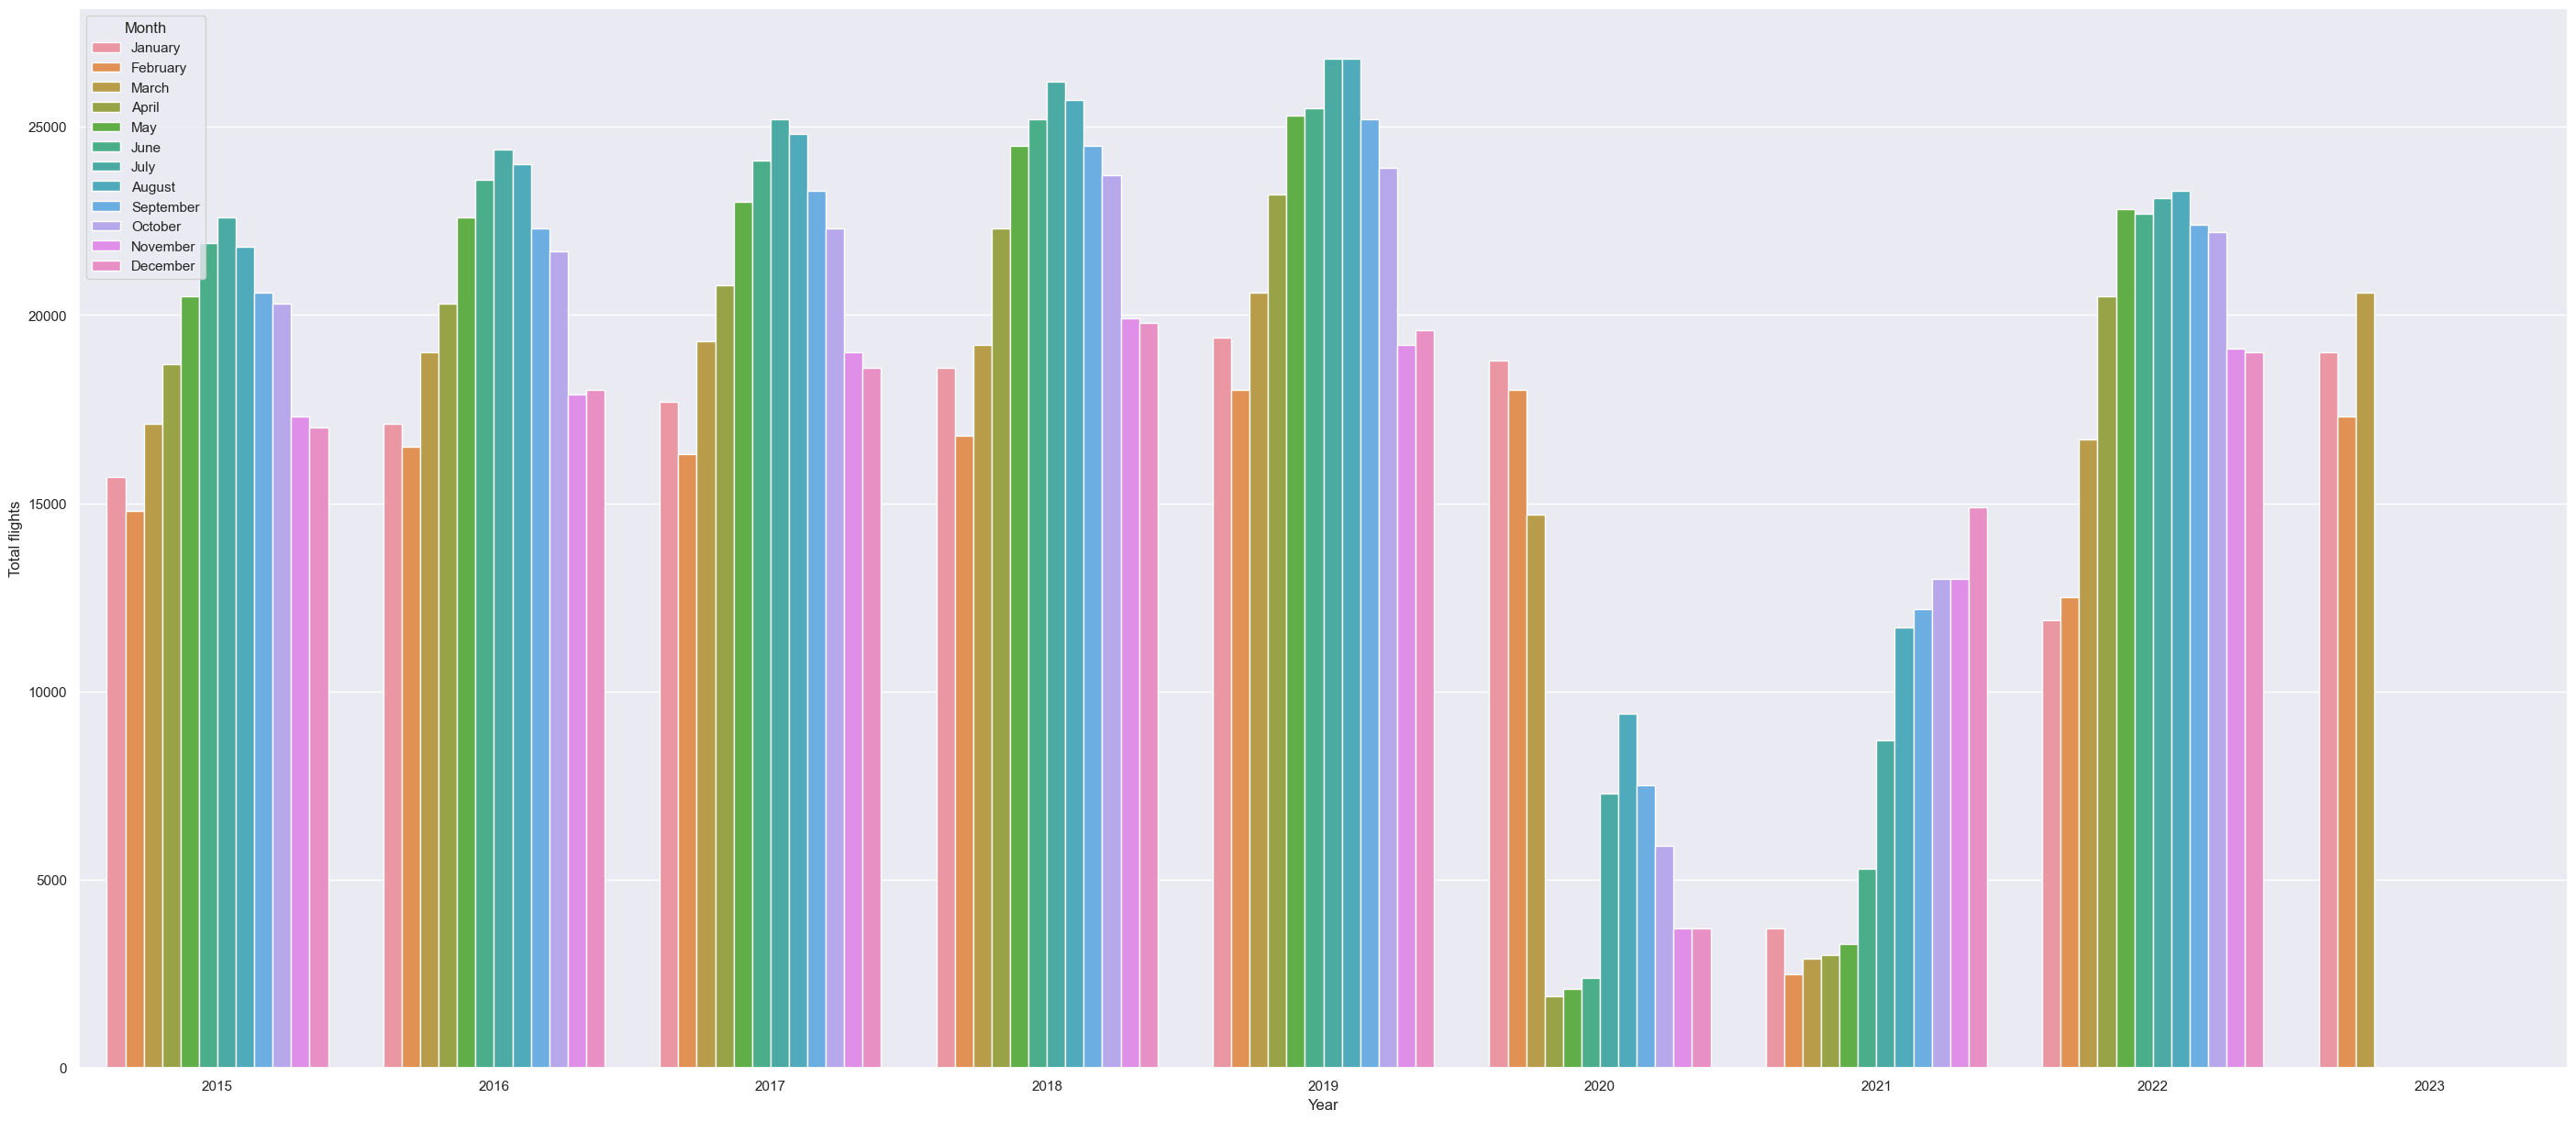

In [110]:
sns.set(rc={'figure.figsize':(35,15)}) #Understanding the total numbers through the years
sns.barplot(x=dfIrTotal.Year, y=dfIrTotal['Total flights'], hue=dfIrTotal.Month)

<Axes: xlabel='Year', ylabel='Total passengers'>

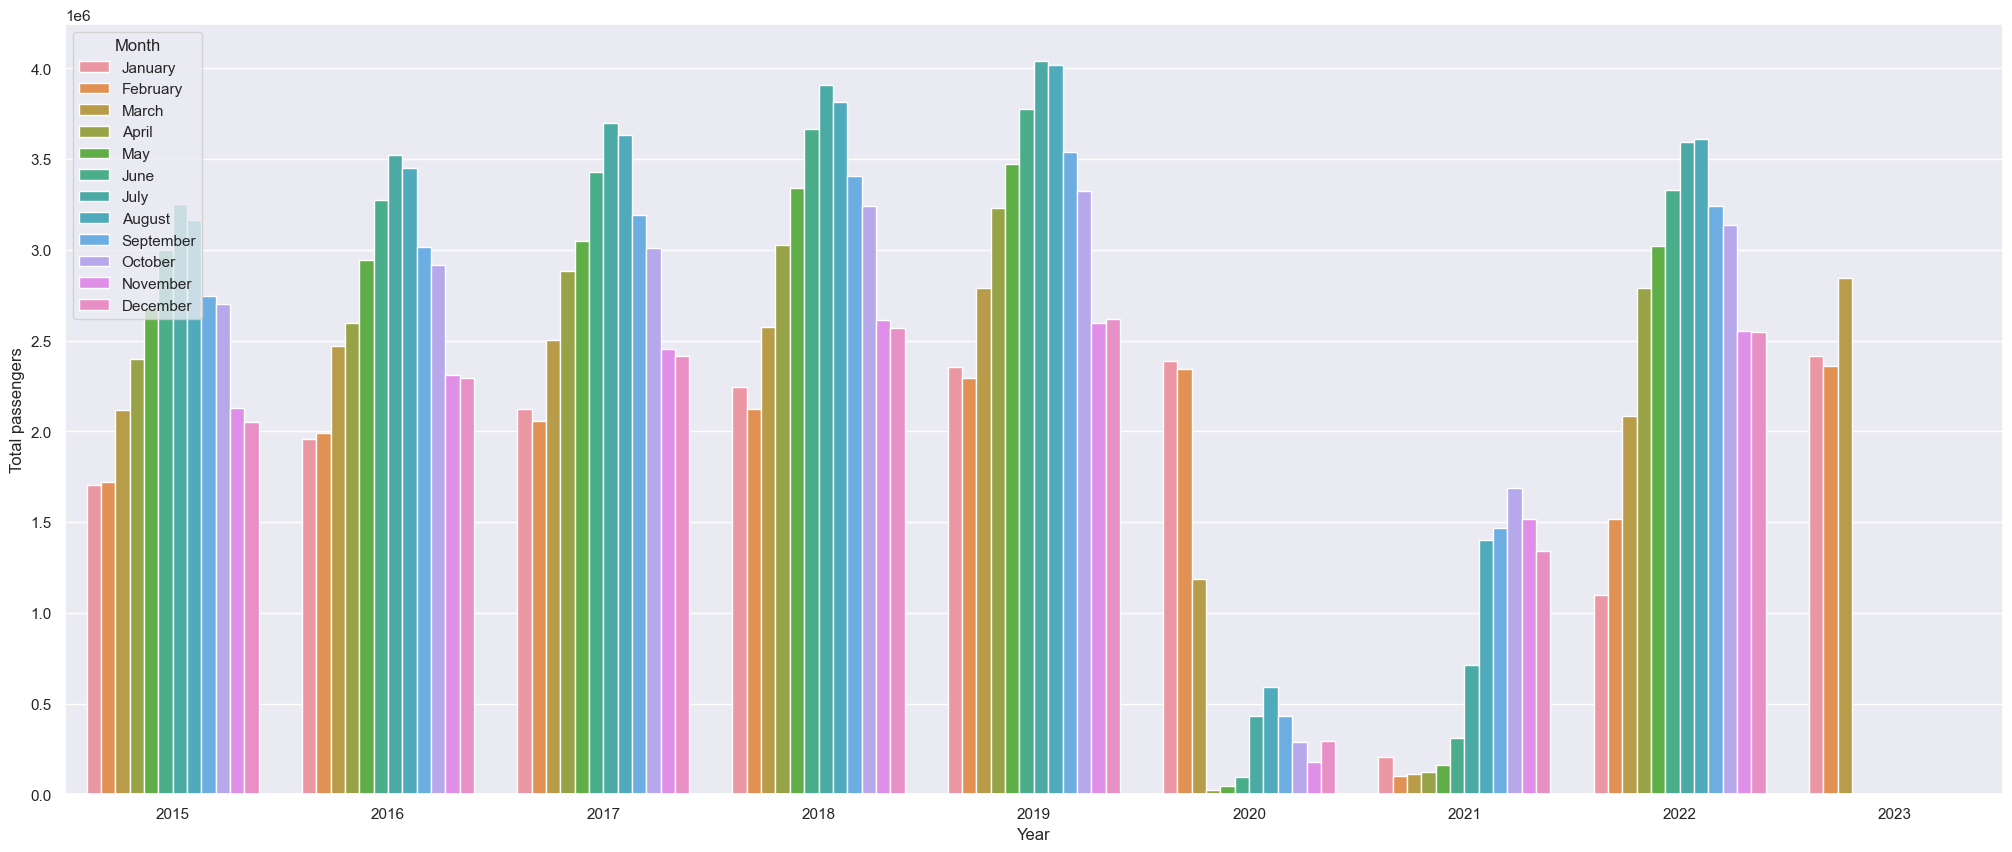

In [111]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfIrTotal.Year, y=dfIrTotal['Total passengers'],hue=dfIrTotal['Month'])

<Axes: xlabel='Year', ylabel='Total cargo'>

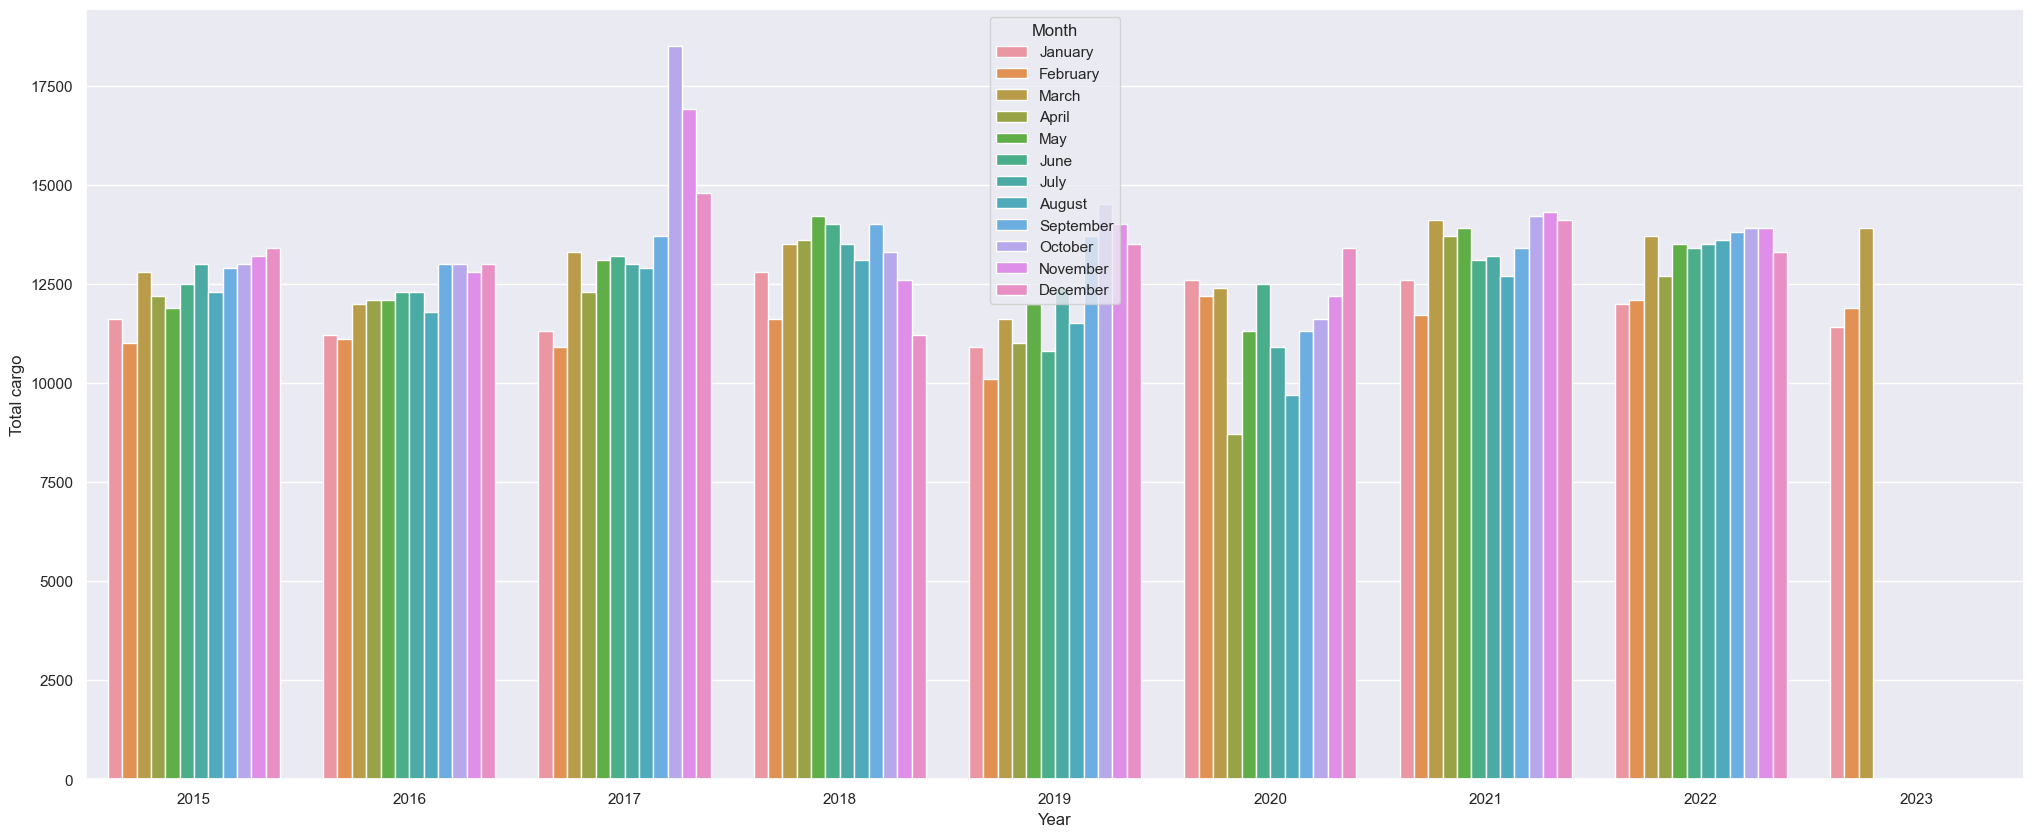

In [112]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x=dfIrTotal.Year, y=dfIrTotal['Total cargo'],hue=dfIrTotal['Month'])

## Identyfing outliers

In [113]:
dfIrTotal.describe()

,Total flights,Scheduled flights,Non-scheduled flights,Total arrival flights,Scheduled arrival flights,Non-scheduled arrival flights,Total departure flights,Scheduled departure flights,Non-scheduled departure flights,Total cargo,Scheduled cargo,Non-scheduled cargo,Total unloaded cargo,Unloaded scheluled cargo,Unloaded non-scheduled cargo,Total loaded cargo,Loaded scheduled cargo,Loaded non-scheduled cargo,Total passengers,Scheduled passengers,Non-scheduled passengers,Total arrival passengers,Arrival scheduled passengers,Arrival non-scheduled passengers,Total departure passengers,Departure scheduled passengers,Departure non-scheduled passengers
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,99.000000,9.900000e+01,9.900000e+01,99.000000,9.900000e+01,9.900000e+01,99.000000
mean,17704.040404,17460.606061,247.474747,8859.595960,8730.303030,121.212121,8844.444444,8727.272727,118.181818,12729.292929,12568.686869,156.565657,6671.717172,6620.202020,43.434343,6063.636364,5951.515152,107.070707,2.312934e+06,2.283674e+06,29272.727273,1.155390e+06,1.140573e+06,14812.121212,1.157544e+06,1.143090e+06,14456.565657
std,6793.558161,6700.941423,162.470364,3402.277724,3350.219443,88.378508,3395.622098,3341.508219,88.483408,1335.179612,1145.768298,432.402311,610.794131,570.888995,107.058649,833.661036,665.070755,352.035633,1.114890e+06,1.096970e+06,24242.738522,5.573774e+05,5.483586e+05,12200.119377,5.582183e+05,5.492904e+05,12138.395496
min,1900.000000,1800.000000,0.000000,900.000000,900.000000,0.000000,900.000000,900.000000,0.000000,8700.000000,8500.000000,0.000000,4800.000000,4800.000000,0.000000,3900.000000,3700.000000,0.000000,2.530000e+04,2.270000e+04,1100.000000,1.220000e+04,1.170000e+04,500.000000,1.300000e+04,1.100000e+04,500.000000
25%,15300.000000,15050.000000,100.000000,7650.000000,7500.000000,100.000000,7650.000000,7550.000000,100.000000,11950.000000,11850.000000,0.000000,6250.000000,6200.000000,0.000000,5650.000000,5600.000000,0.000000,1.710700e+06,1.684300e+06,10700.000000,8.624000e+05,8.531000e+05,5500.000000,8.590000e+05,8.448500e+05,4750.000000
50%,19200.000000,19000.000000,200.000000,9600.000000,9500.000000,100.000000,9600.000000,9500.000000,100.000000,12800.000000,12700.000000,100.000000,6700.000000,6700.000000,0.000000,6100.000000,6000.000000,0.000000,2.549100e+06,2.522600e+06,22900.000000,1.264300e+06,1.254400e+06,11700.000000,1.246700e+06,1.243700e+06,10800.000000
75%,22650.000000,22350.000000,300.000000,11350.000000,11150.000000,150.000000,11350.000000,11150.000000,200.000000,13500.000000,13400.000000,200.000000,7000.000000,7000.000000,0.000000,6500.000000,6500.000000,100.000000,3.177700e+06,3.129900e+06,39250.000000,1.587400e+06,1.565600e+06,20200.000000,1.580250e+06,1.564150e+06,21600.000000
max,26800.000000,26300.000000,700.000000,13400.000000,13100.000000,300.000000,13400.000000,13100.000000,300.000000,18500.000000,15000.000000,3900.000000,8300.000000,7600.000000,800.000000,10200.000000,7600.000000,3100.000000,4.040600e+06,3.973800e+06,84300.000000,2.042100e+06,2.006400e+06,41500.000000,2.014900e+06,1.981000e+06,42800.000000


<Axes: >

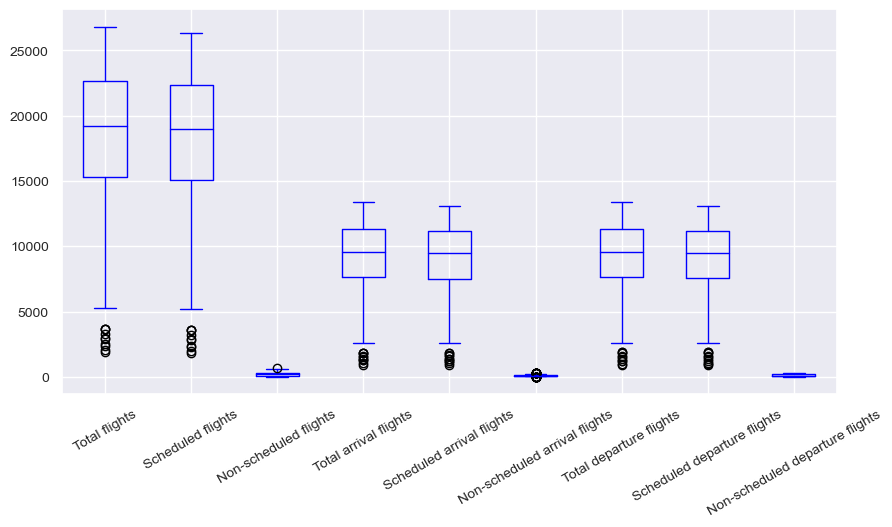

In [114]:
 #Identifying outliers for flights
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,2:11].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

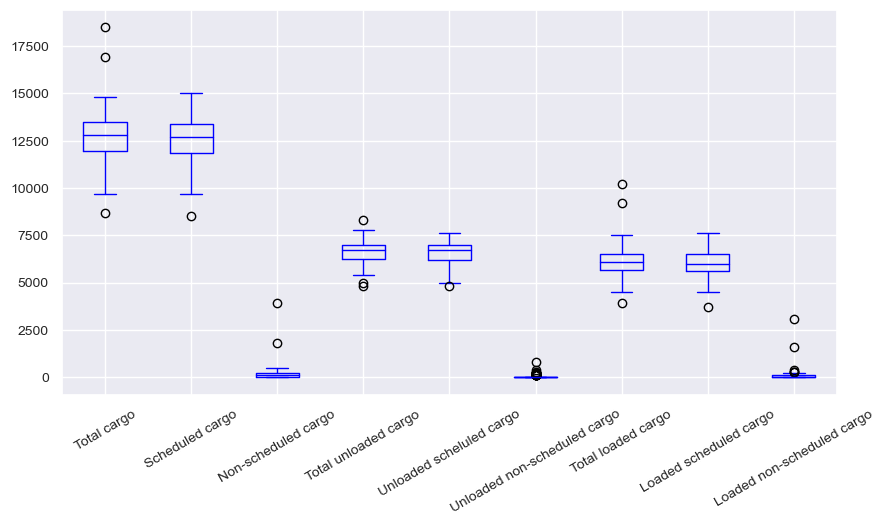

In [115]:
#Identifying outliers for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,11:20].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

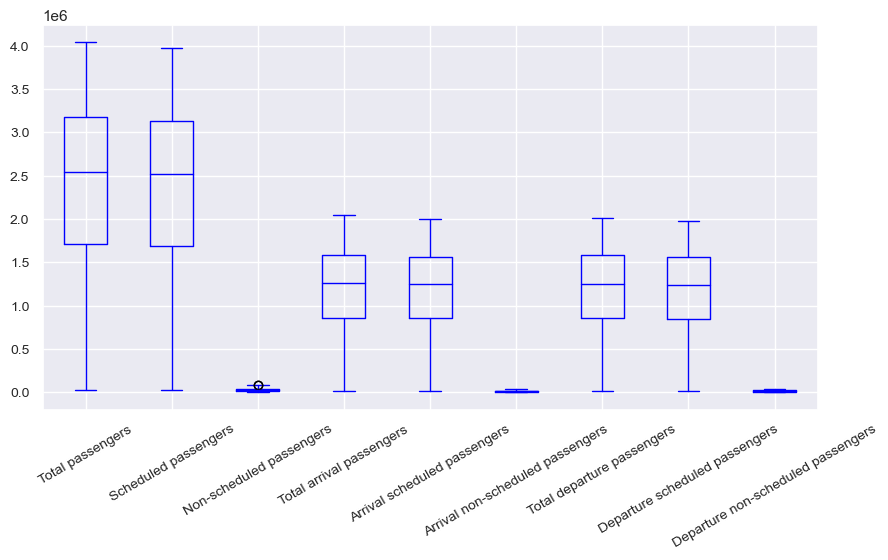

In [116]:
#Identifying outliers for passengers
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,20:].boxplot(grid='true', color='blue',fontsize=10, rot=30)

In [117]:
Q1 = dfIrTotal.quantile(0.25)
Q3 = dfIrTotal.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Total flights                            7350.0
Scheduled flights                        7300.0
Non-scheduled flights                     200.0
Total arrival flights                    3700.0
Scheduled arrival flights                3650.0
Non-scheduled arrival flights              50.0
Total departure flights                  3700.0
Scheduled departure flights              3600.0
Non-scheduled departure flights           100.0
Total cargo                              1550.0
Scheduled cargo                          1550.0
Non-scheduled cargo                       200.0
Total unloaded cargo                      750.0
Unloaded scheluled cargo                  800.0
Unloaded non-scheduled cargo                0.0
Total loaded cargo                        850.0
Loaded scheduled cargo                    900.0
Loaded non-scheduled cargo                100.0
Total passengers                      1467000.0
Scheduled passengers                  1445600.0
Non-scheduled passengers                

C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\3321224550.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dfIrTotal.quantile(0.25)
C:\Users\ruben\AppData\Local\Temp\ipykernel_19168\3321224550.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dfIrTotal.quantile(0.75)


In [119]:
dfIrTotal = dfIrTotal[~((dfIrTotal.iloc[:,2:] < (Q1-1.5 * IQR)) |(dfIrTotal.iloc[:,2:] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

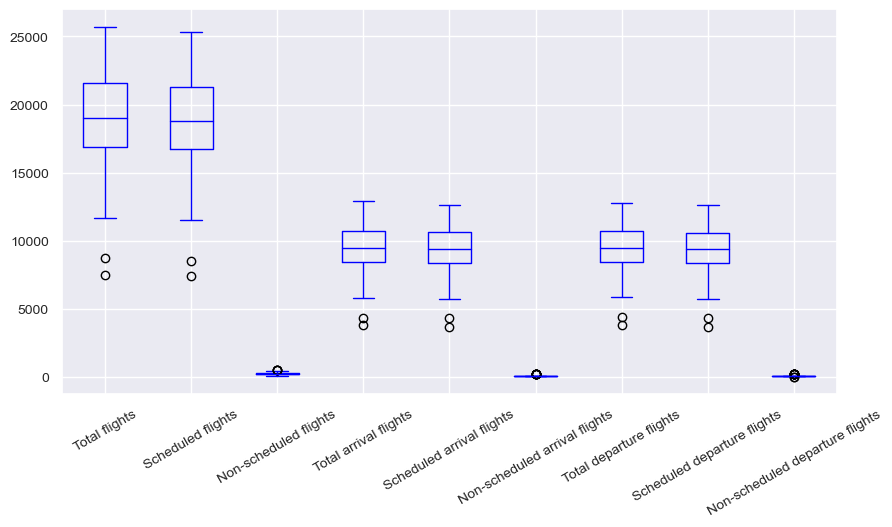

In [120]:
 #Confirming most outliers were dropped for flights
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,2:11].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

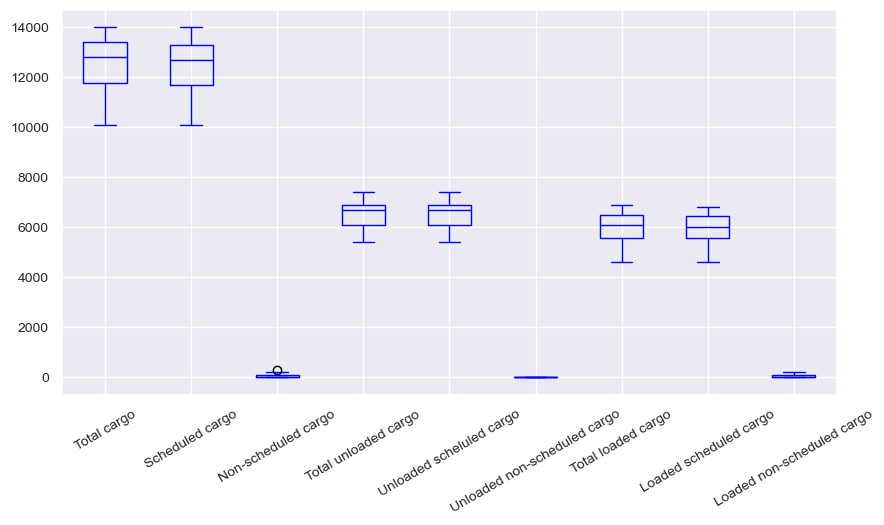

In [121]:
#Confirming most outliers were dropped for cargo
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,11:20].boxplot(grid='true', color='blue',fontsize=10, rot=30)

<Axes: >

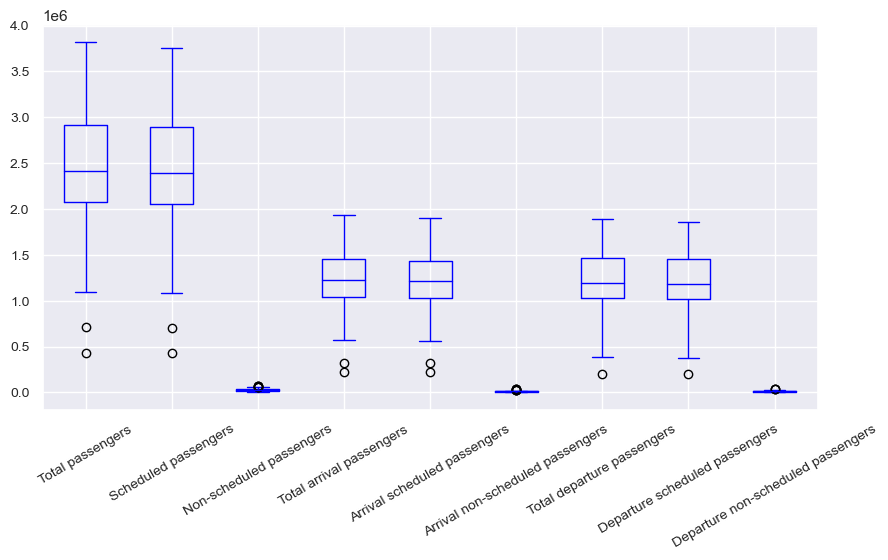

In [122]:
#COnfirming outliers changed for passengers

#Some outliers increased due to the outlier elimination in other features, but they are way less than the original ones in other features
plt.rcParams['figure.figsize'] = (10,5)
dfIrTotal.iloc[:,20:].boxplot(grid='true', color='blue',fontsize=10, rot=30)